In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns

# ANALYSE UNIVARIEE

In [2]:
data=pd.read_csv('Data_cleaned_openfoodfacts.csv',sep='\t',low_memory=False)
print(data.shape)
data.head()

(262292, 24)


code                                                url  \
0  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016100  http://world-fr.openfoodfacts.org/produit/0000...   

                        product_name countries_fr  additives_n additives_tags  \
0     Banana Chips Sweetened (Whole)   États-Unis          0.0            NaN   
1                            Peanuts   États-Unis          0.0            NaN   
2             Organic Salted Nut Mix   États-Unis          0.0            NaN   
3                    Organic Polenta   États-Unis          0.0            NaN   
4  Breadshop Honey Gone Nuts Granola   États-Unis          0.0            NaN   

  nutrition_grade_fr pnns_groups_1  energy_100g  fat_100g  ...  sugars_100g  \
0                  d           NaN       2243.0     28.57  ...     14.29000   
1                  b           NaN       1941.0     17.86  ...     17.86000   
2                  d           NaN       2540.0     57.14  ...      3.57000   
3                  d           NaN       1552.0      1.43  ...     38.48881   
4                  d           NaN       1933.0     18.27  ...     11.54000   

   fiber_100g  proteins_100g  salt_100g  sodium_100g  vitamin-a_100g  \
0         3.6           3.57   0.000000     0.000000             0.0   
1         7.1          17.86   0.635000     0.250000             0.0   
2         7.1          17.86   1.224280     0.482000             0.0   
3         5.7           8.57   1.649352     0.660241             0.0   
4         7.7          13.46   1.649352     0.660241             0.0   

   vitamin-c_100g  calcium_100g  iron_100g  nutrition-score-fr_100g  
0          0.0214         0.000    0.00129                     14.0  
1          0.0000         0.071    0.00129                      0.0  
2          0.0000         0.143    0.00514                     12.0  
3          0.0000         0.056    0.00120                      NaN  
4          0.0000         0.038    0.00346                      NaN  

[5 rows x 24 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262292 entries, 0 to 262291
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     262292 non-null  object 
 1   url                      262292 non-null  object 
 2   product_name             258924 non-null  object 
 3   countries_fr             262225 non-null  object 
 4   additives_n              235199 non-null  float64
 5   additives_tags           150332 non-null  object 
 6   nutrition_grade_fr       262292 non-null  object 
 7   pnns_groups_1            55629 non-null   object 
 8   energy_100g              262292 non-null  float64
 9   fat_100g                 262292 non-null  float64
 10  saturated-fat_100g       262292 non-null  float64
 11  trans-fat_100g           262292 non-null  float64
 12  cholesterol_100g         262292 non-null  float64
 13  carbohydrates_100g       262292 non-null  float64
 14  suga

## Variables quantitatives

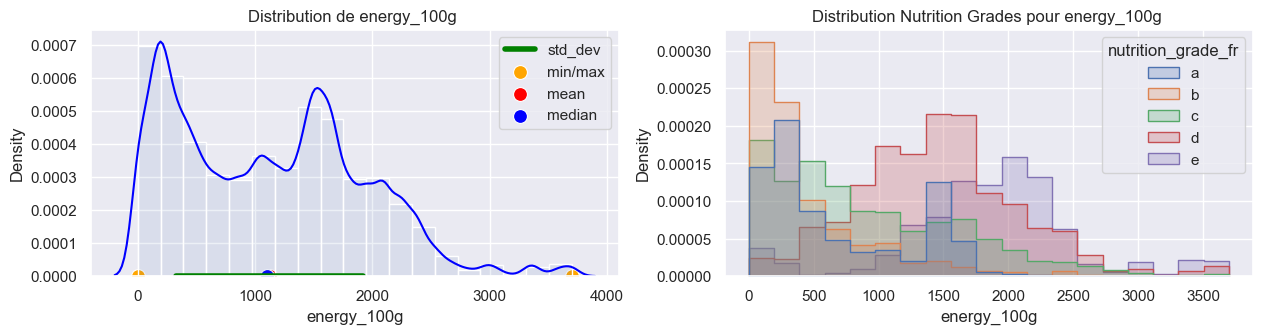

whis_low  quant25  median  quant75  whis_high     IQR
0   -1558.5    381.0  1100.0   1674.0     3613.5  1293.0

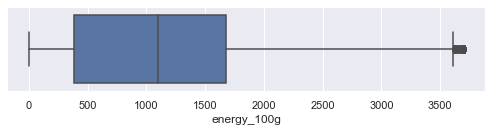

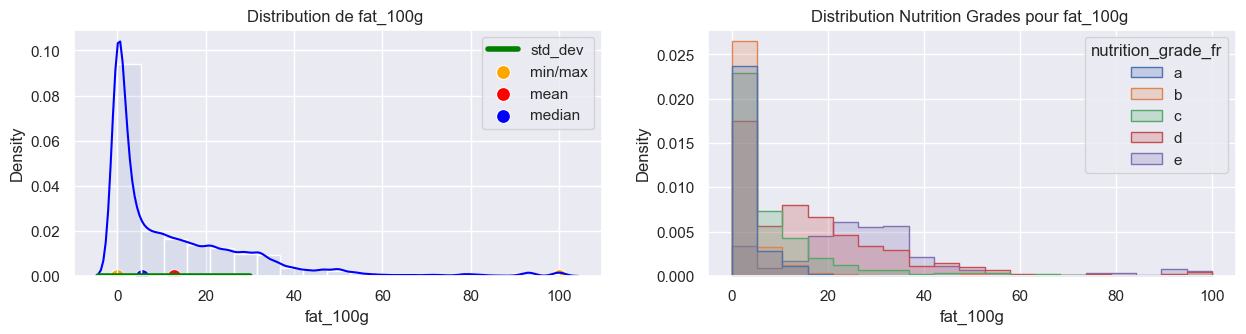

whis_low  quant25  median  quant75  whis_high    IQR
0    -30.43      0.0    5.45    20.28      50.71  20.28

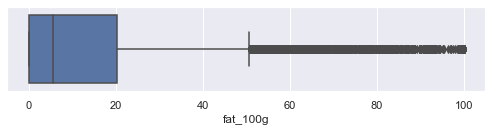

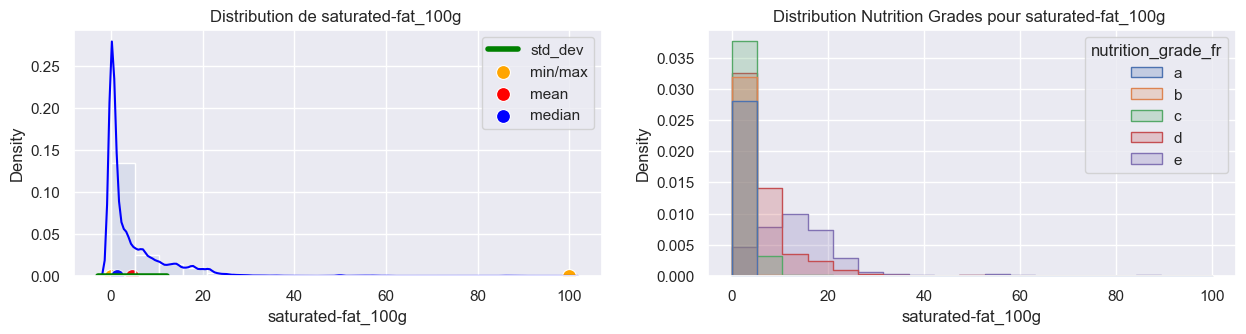

whis_low  quant25  median  quant75  whis_high   IQR
0     -10.0      0.0    1.25     6.67      16.67  6.67

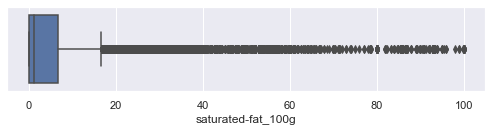

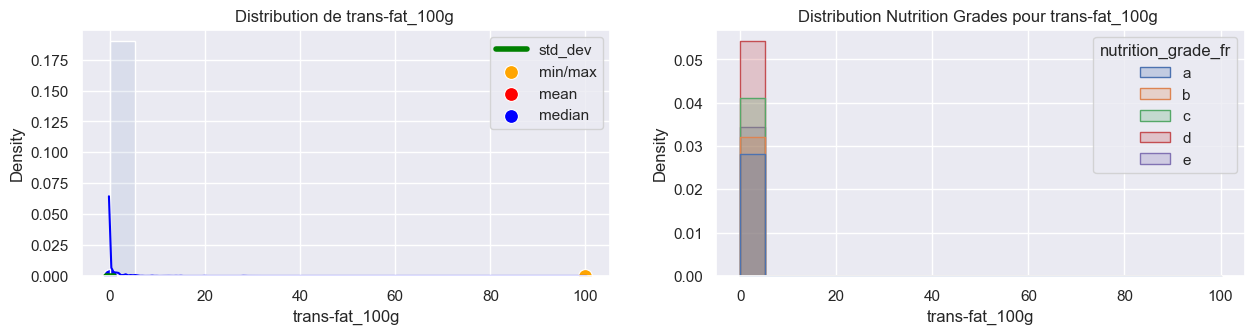

whis_low  quant25  median  quant75  whis_high  IQR
0       0.0      0.0     0.0      0.0        0.0  0.0

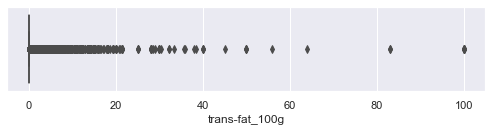

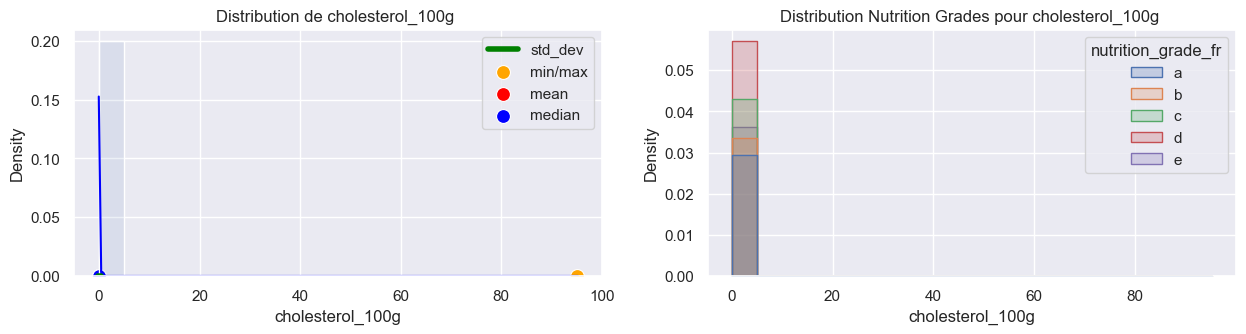

whis_low  quant25  median  quant75  whis_high  IQR
0     -0.01      0.0     0.0      0.0       0.01  0.0

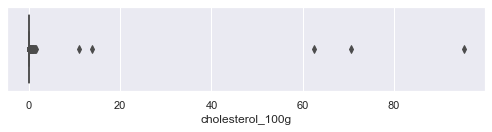

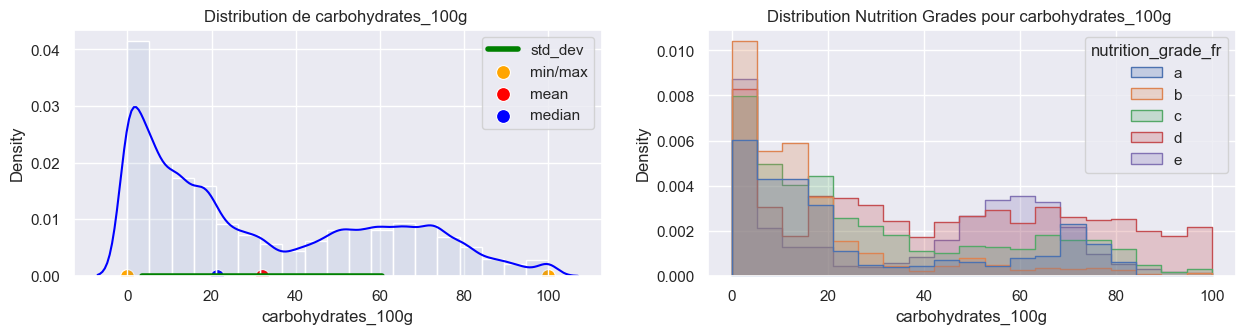

whis_low  quant25  median  quant75  whis_high    IQR
0    -69.04     6.67   21.21    57.14     132.84  50.47

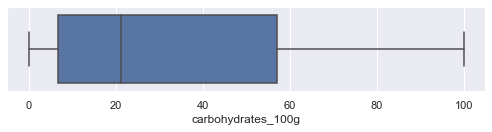

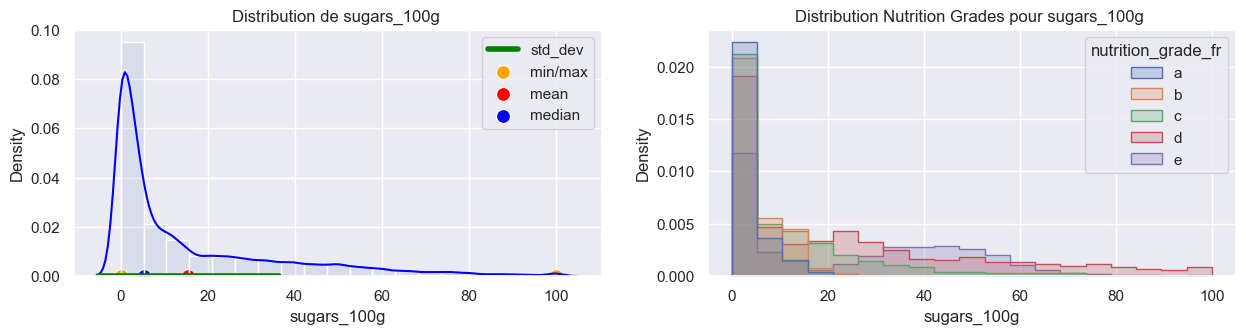

whis_low  quant25  median  quant75  whis_high    IQR
0    -32.49      1.0    5.26    23.33      56.82  22.33

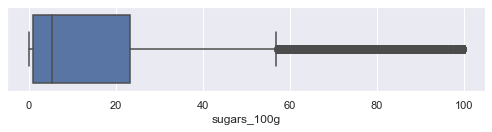

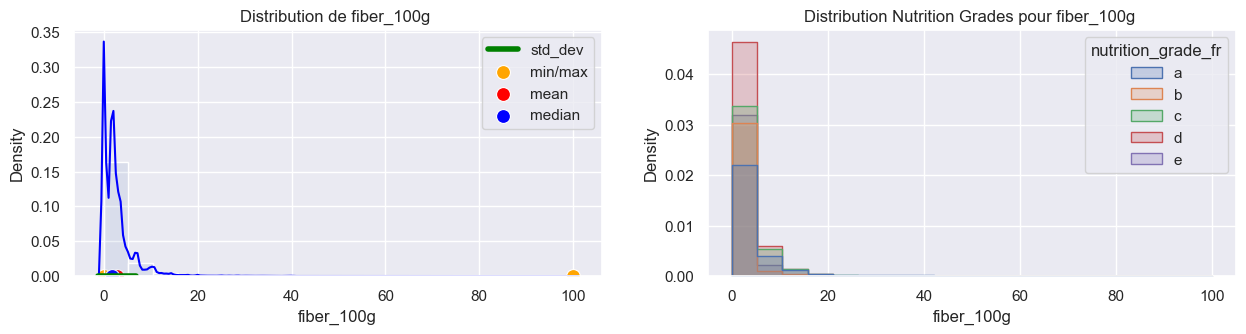

whis_low  quant25  median  quant75  whis_high   IQR
0     -5.13      0.0    1.79     3.42       8.56  3.42

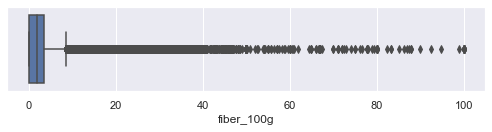

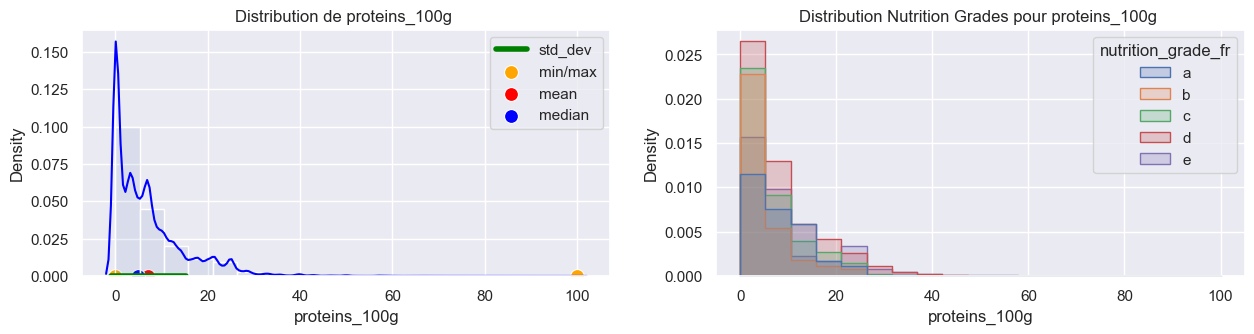

whis_low  quant25  median  quant75  whis_high  IQR
0    -13.25      0.7    4.84     10.0      23.95  9.3

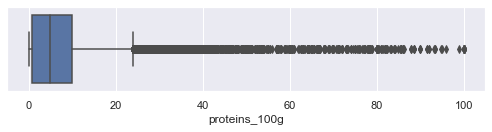

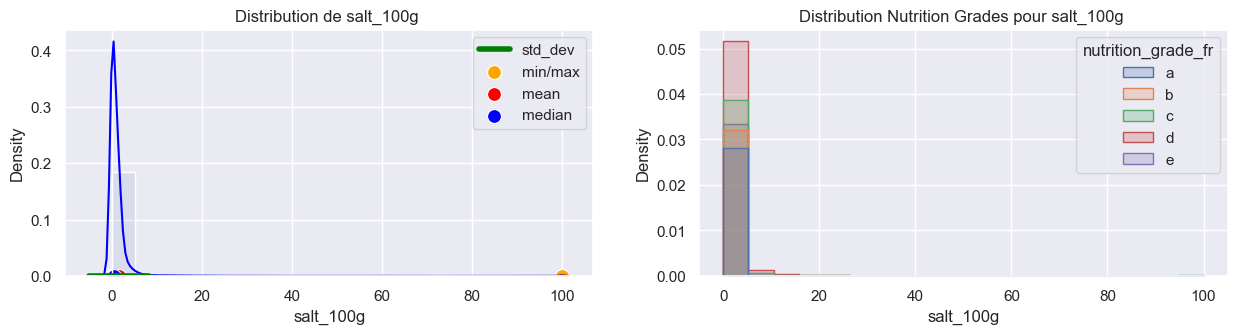

whis_low  quant25  median  quant75  whis_high   IQR
0     -2.04     0.07    0.61     1.48       3.58  1.41

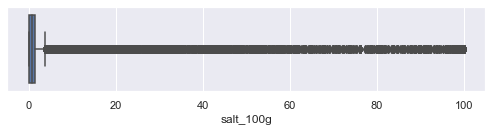

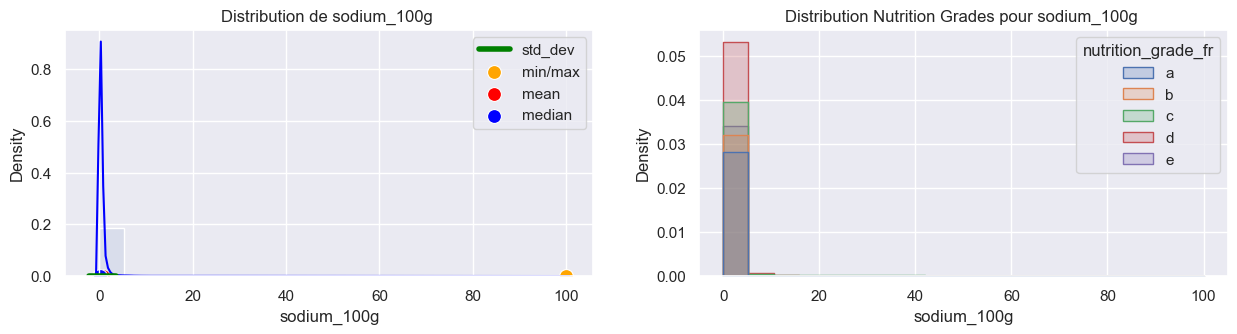

whis_low  quant25  median  quant75  whis_high   IQR
0      -0.8     0.03    0.24     0.58       1.41  0.55

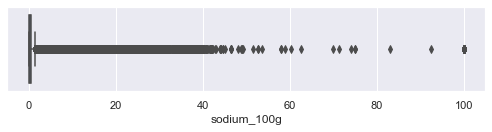

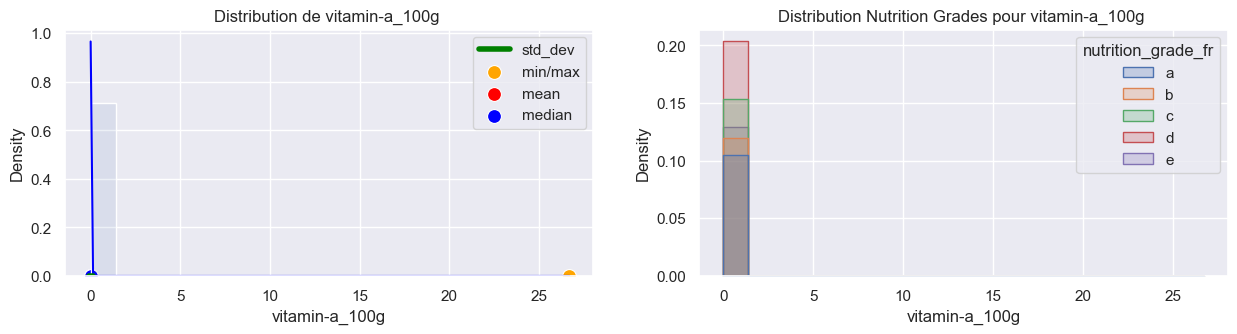

whis_low  quant25  median  quant75  whis_high  IQR
0      -0.0      0.0     0.0      0.0        0.0  0.0

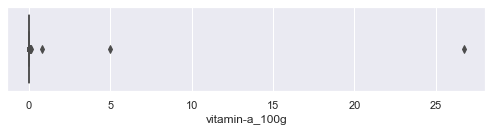

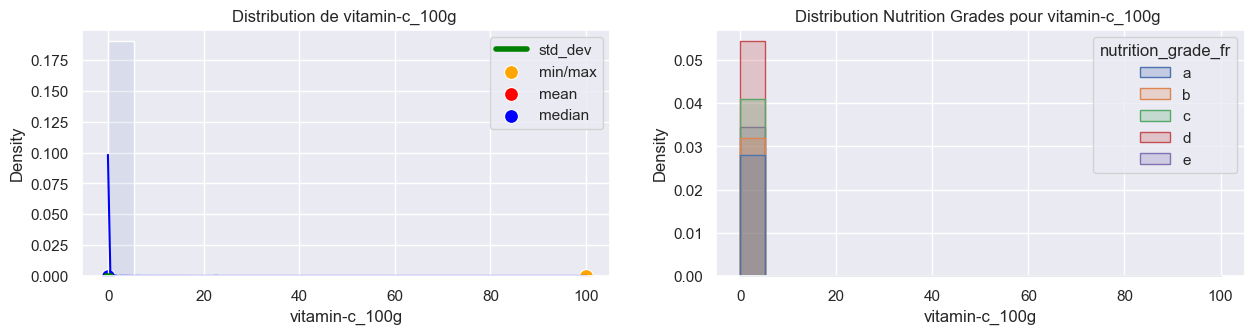

whis_low  quant25  median  quant75  whis_high  IQR
0      -0.0      0.0     0.0      0.0        0.0  0.0

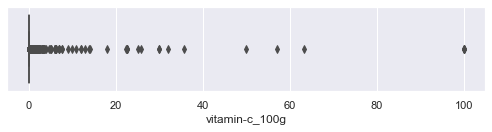

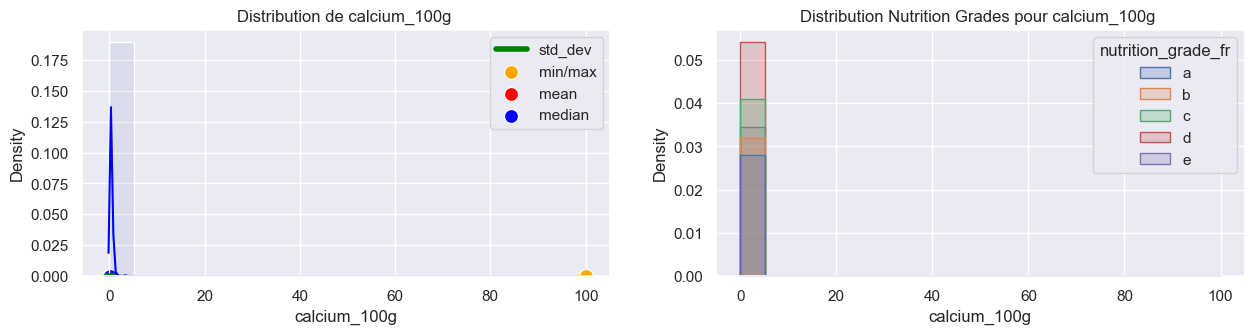

whis_low  quant25  median  quant75  whis_high   IQR
0      -0.1     0.02    0.06      0.1       0.22  0.08

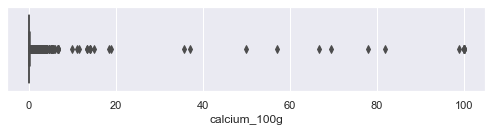

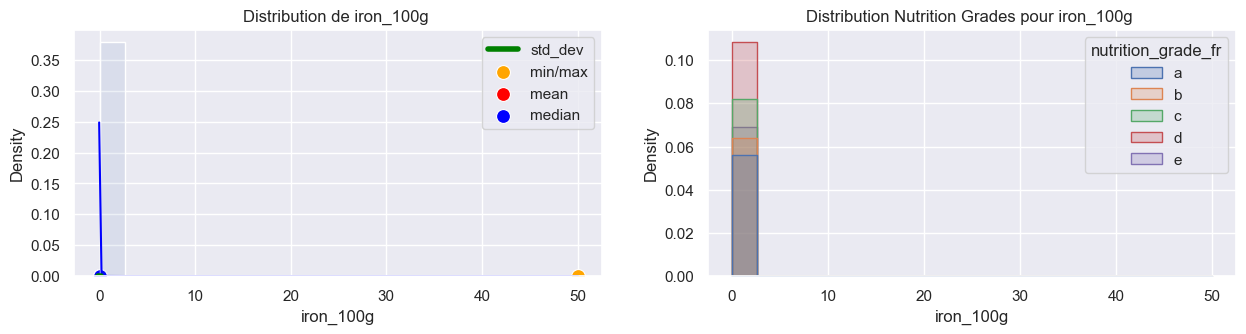

whis_low  quant25  median  quant75  whis_high  IQR
0      -0.0      0.0     0.0      0.0        0.0  0.0

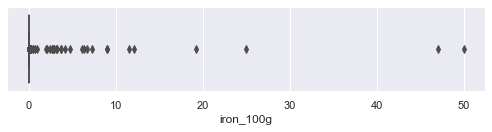

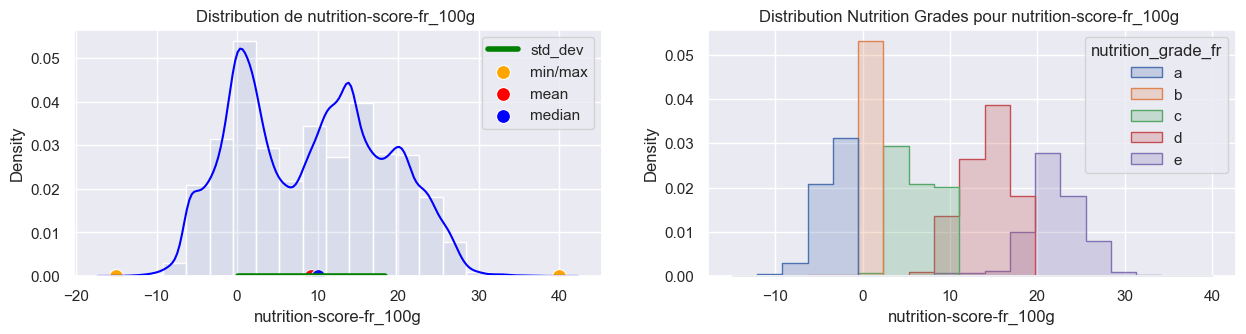

whis_low  quant25  median  quant75  whis_high   IQR
0     -21.5      1.0    10.0     16.0       38.5  15.0

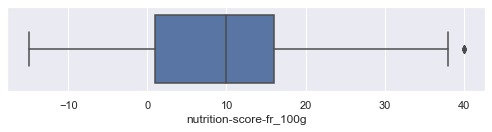

In [4]:
data_quantit=data.select_dtypes(exclude='object')
data_quantit=data_quantit.drop(['additives_n'],axis=1)

def Univar_Analysis(var): 
    count=round(data_quantit[var].shape[0],0)
    miss=round(data_quantit[var].isna().sum(),0)
    mini=data_quantit[var].min()
    maxi=round(data_quantit[var].max(),1)
    ran = round(data_quantit[var].max()-data_quantit[var].min(),1)
    mean = round(data_quantit[var].mean(),1)
    median = data_quantit[var].median()
    st_dev = data_quantit[var].std()
    int_std=[round(mean-st_dev,1),round(mean+st_dev,1)]
    skew = data_quantit[var].skew()
    kurt = data_quantit[var].kurtosis()
    stat=np.array([[count,miss,mini,maxi,ran,mean,median,int_std,skew,kurt]],dtype=object)
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
    param=pd.DataFrame(stat,columns=['count','missing values','min','max','range','mean','median','stdev','skewness','kurtosis'])  
    param = param.style.set_caption('Variable '+var).set_table_styles([{'selector': 'caption','props': [('color', 'red'),('font-size', '16px')]}]).format(precision=2)
    display(param)
    sns.set()
    fig=plt.figure(figsize=[15,15],dpi=100)
    fig.add_subplot(4,2,1)
    k=(1+np.log2(data[var].shape[0])).round().astype(int)
    ax=sns.histplot(data=data,x=var, element="bars",stat="density",bins=k,alpha=0.1)
    sns.kdeplot(data=data,x=var,color="blue")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max",s=100)
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean",s=100)
    sns.lineplot(x=int_std, y=[0,0], color = 'green', label = "std_dev",linewidth = 4)
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median",s=100)
    ax.set_title("Distribution de {} ".format(var))
    fig.add_subplot(4,2,2)
    hue_order = ['a', 'b', 'c', 'd', 'e']
    ax=sns.histplot(data=data,x=var, element="step",stat="density",bins=k,hue_order=hue_order,hue='nutrition_grade_fr')
    ax.set_title("Distribution Nutrition Grades pour {} ".format(var))
    plt.show()
    quant25 = data_quantit[var].quantile(0.25)
    quant75 = data_quantit[var].quantile(0.75)
    IQR = quant75 - quant25
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    box_plt=[whis_low,quant25,median,quant75,whis_high,IQR]
    stat_box=np.array([box_plt])
    param_box=pd.DataFrame(stat_box,columns=['whis_low','quant25','median','quant75','whis_high','IQR']).round(2)
    display(param_box)
    fig=plt.figure(figsize=[7,2])
    ax = sns.boxplot(x=data[var], showfliers=True)
    fig.tight_layout()
    plt.show()
    return

for var in data_quantit:
    Univar_Analysis(var)
    

## Variables qualitatives

### Categories de produit

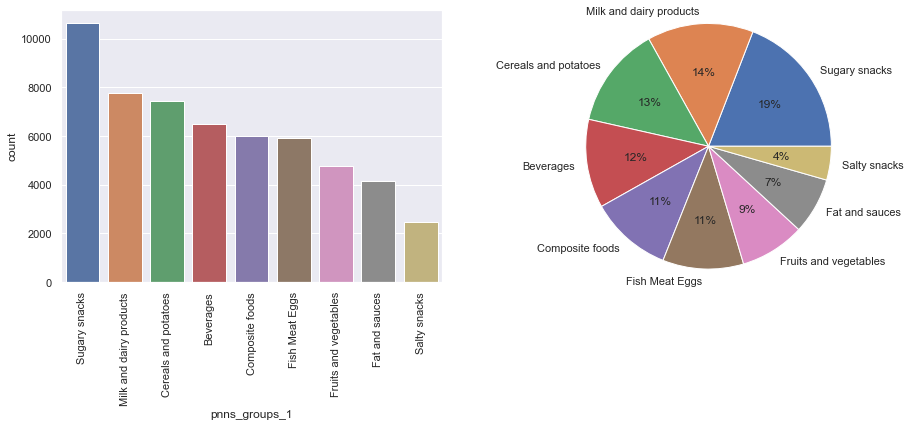

In [5]:
data_qualit=data.select_dtypes(exclude='float')
fig=plt.figure(figsize=[15,5])
ax=plt.subplot2grid((1,2),(0,0))

sns.countplot(x='pnns_groups_1',data=data,order=data['pnns_groups_1'].value_counts().index)
colors = sns.color_palette('pastel')[0:len(data['pnns_groups_1'].unique())]
plt.xticks(rotation=90)

ax=plt.subplot2grid((1,2),(0,1))
labels=data['pnns_groups_1'].value_counts().index.tolist()
plt.pie(data['pnns_groups_1'].value_counts(normalize=True),labels=labels,autopct='%.0f%%')
plt.axis('equal') 
plt.show()

### Additifs

In [6]:
additifs=pd.read_csv("Additives.csv",sep=';')
additifs_df=additifs[['Code','Status']]
data_additifs=data["additives_tags"]
data_additifs=data_additifs.str.split(',')
data_additifs=data_additifs.dropna()

In [7]:
additifs_df.head()

Code                                          Status
0   e100  Approved in the EU.[9] Approved in the US.[10]
1   e101  Approved in the EU.[9] Approved in the US.[10]
2  e101a                          Approved in the EU.[9]
3   e102  Approved in the EU.[9] Approved in the US.[10]
4   e103                                             NaN

In [8]:
#création dictionnaires additifs permis et interdites
import collections
dict_additifs_OK={}
dict_additifs_NOK={}
for elem in data_additifs:
        for additif in elem:
            idx=additifs_df[additifs_df.Code==additif].Status
            if additif in additifs_df.Code.values and idx.str.contains('Approved in the EU', regex=False,na=False).bool():
                if additif in dict_additifs_OK.keys():
                    dict_additifs_OK[additif]+=1
                else:
                    dict_additifs_OK[additif]=1
            elif additif in additifs_df.Code.values:
                if additif in dict_additifs_NOK.keys():
                    dict_additifs_NOK[additif]+=1
                else:
                    dict_additifs_NOK[additif]=1
#sort du dictionnaire additifs interdites par ordre décroissant
a = sorted(dict_additifs_NOK.items(), key=lambda x: x[1],reverse=True)
sorted_dict = collections.OrderedDict(a[0:20])            

In [9]:
#création dictionnaire nombre additifs
data_nbr_additifs=data['additives_n']
data_nbr_additifs=data_nbr_additifs.dropna()
dict_nr_additifs={}

for element in data_nbr_additifs:
    element_str=str(element)
    if element_str in dict_nr_additifs.keys():
        dict_nr_additifs[element_str]+=1
    else:
        dict_nr_additifs[element_str]=1
    
#sort du dictionnaire par ordre décroissant
a1 = sorted(dict_nr_additifs.items(), key=lambda x: x[1],reverse=True)
sorted_dict1 = collections.OrderedDict(a1[1:20])  

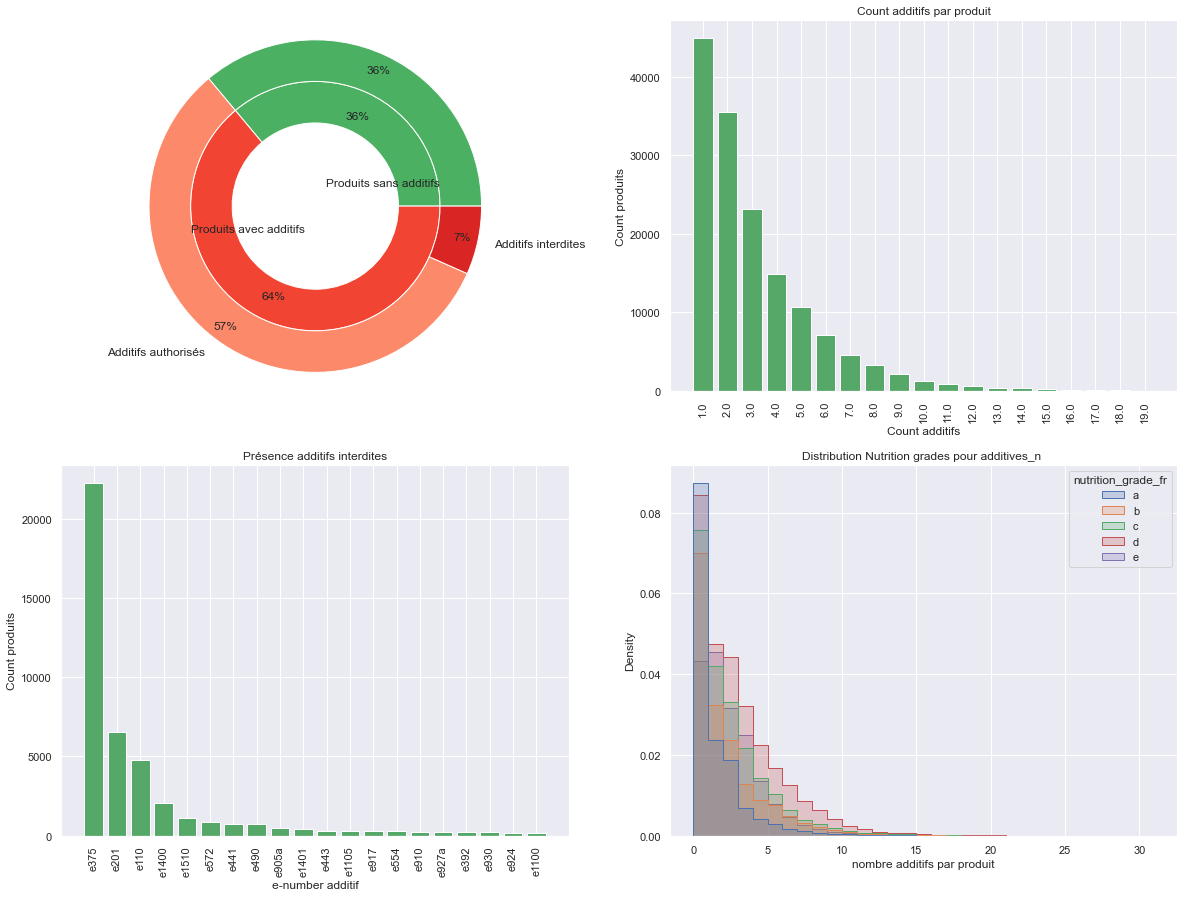

In [10]:
#donut présence additives dans les produits et repartition
produit_sans_addit_cnt=data_nbr_additifs.shape[0]-len(data_additifs)
produit_avec_addit_cnt=len(data_additifs)
produits_tot=[produit_sans_addit_cnt,produit_avec_addit_cnt]
fig=plt.figure(figsize=[20,15])

ax=plt.subplot2grid((2,2),(0,0))
labels=['Produits sans additifs','Produits avec additifs']

# Create colors
a, b=[plt.cm.Greens, plt.cm.Reds]

#1st level donut
mypie,_,_ = ax.pie(produits_tot, radius=1.5, labels=labels, labeldistance=0.2, colors=[a(0.6), b(0.6)], autopct='%.0f%%',pctdistance=0.8, textprops={'fontsize': 12})
plt.setp(mypie, width=0.5, edgecolor='white')

#2nd level donut
labels1=['','Additifs authorisés','Additifs interdites']
produits_tot1=[produit_sans_addit_cnt,(sum(dict_additifs_OK.values())/(sum(dict_additifs_OK.values())+sum(dict_additifs_NOK.values())))*produit_avec_addit_cnt,
              (sum(dict_additifs_NOK.values())/(sum(dict_additifs_OK.values())+sum(dict_additifs_NOK.values())))*produit_avec_addit_cnt]
mypie1,_,_ = ax.pie(produits_tot1, radius=2, labels=labels1, labeldistance=1.1, colors=[a(0.6), b(0.4),b(0.7)], autopct='%.0f%%',pctdistance=0.9, textprops={'fontsize': 12})
plt.setp(mypie1, width=0.5, edgecolor='white')
plt.axis('equal')

#bar-plot nombre additifs par produit
ax=plt.subplot2grid((2,2),(0,1))
plt.bar(sorted_dict1.keys(), sorted_dict1.values(),color='g')
plt.xlabel('Count additifs')
plt.ylabel('Count produits')
ax.set_title('Count additifs par produit',loc='center')
plt.xticks(rotation=90);

#bar-plot additifs interdites
ax=plt.subplot2grid((2,2),(1,0))
plt.bar(sorted_dict.keys(), sorted_dict.values(),color='g')
plt.xlabel('e-number additif')
plt.ylabel('Count produits')
ax.set_title('Présence additifs interdites',loc='center')
plt.xticks(rotation=90);

#distribution score Nutriscore pour additifs_n
ax=plt.subplot2grid((2,2),(1,1))
hue_order = ['a', 'b', 'c', 'd', 'e']
ax=sns.histplot(data=data,x='additives_n', element="step",stat="density",bins=31,hue_order=hue_order,hue='nutrition_grade_fr')
ax.set_xlabel('nombre additifs par produit')
ax.set_title("Distribution Nutrition grades pour additives_n ")
plt.show()


### Pays

In [11]:
data_pays=data['countries_fr']
data_pays=data_pays.str.split(',')
data_pays=data_pays.dropna()

In [12]:
#création dictionnaire pays
print(data_pays.shape[0])
dict_pays={}
i=0
for element in data_pays:
    for pays in element:
        if pays in dict_pays.keys():
            dict_pays[pays]+=1
        else:
            dict_pays[pays]=1
    
#sort of dictionary in descending order
a2 = sorted(dict_pays.items(), key=lambda x: x[1],reverse=True)
sorted_dict2 = collections.OrderedDict(a2[0:5])

262225


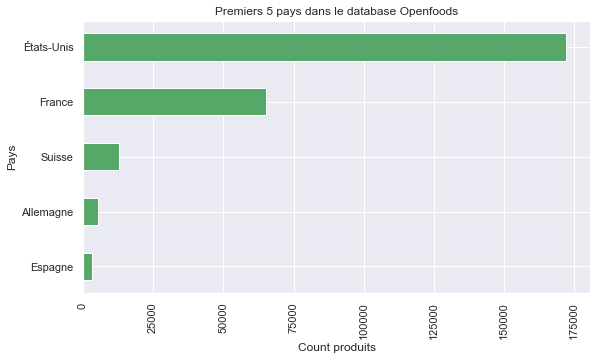

In [13]:
fig=plt.figure(figsize=[20,5])
ax=plt.subplot2grid((1,2),(0,0))
ax.barh(list(sorted_dict2.keys()), list(sorted_dict2.values()),height = 0.5,color='g')
ax.invert_yaxis()
plt.xlabel('Count produits')
plt.ylabel('Pays')
ax.set_title('Premiers 5 pays dans le database Openfoods', loc='center')
plt.xticks(rotation=90);

# ANALYSE MULTIVARIEE

## Analyse relations entre variables quantitatives

In [14]:
data_quantit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262292 entries, 0 to 262291
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   energy_100g              262292 non-null  float64
 1   fat_100g                 262292 non-null  float64
 2   saturated-fat_100g       262292 non-null  float64
 3   trans-fat_100g           262292 non-null  float64
 4   cholesterol_100g         262292 non-null  float64
 5   carbohydrates_100g       262292 non-null  float64
 6   sugars_100g              262292 non-null  float64
 7   fiber_100g               262292 non-null  float64
 8   proteins_100g            262292 non-null  float64
 9   salt_100g                262292 non-null  float64
 10  sodium_100g              262292 non-null  float64
 11  vitamin-a_100g           262292 non-null  float64
 12  vitamin-c_100g           262292 non-null  float64
 13  calcium_100g             262292 non-null  float64
 14  iron

<Figure size 720x480 with 0 Axes>

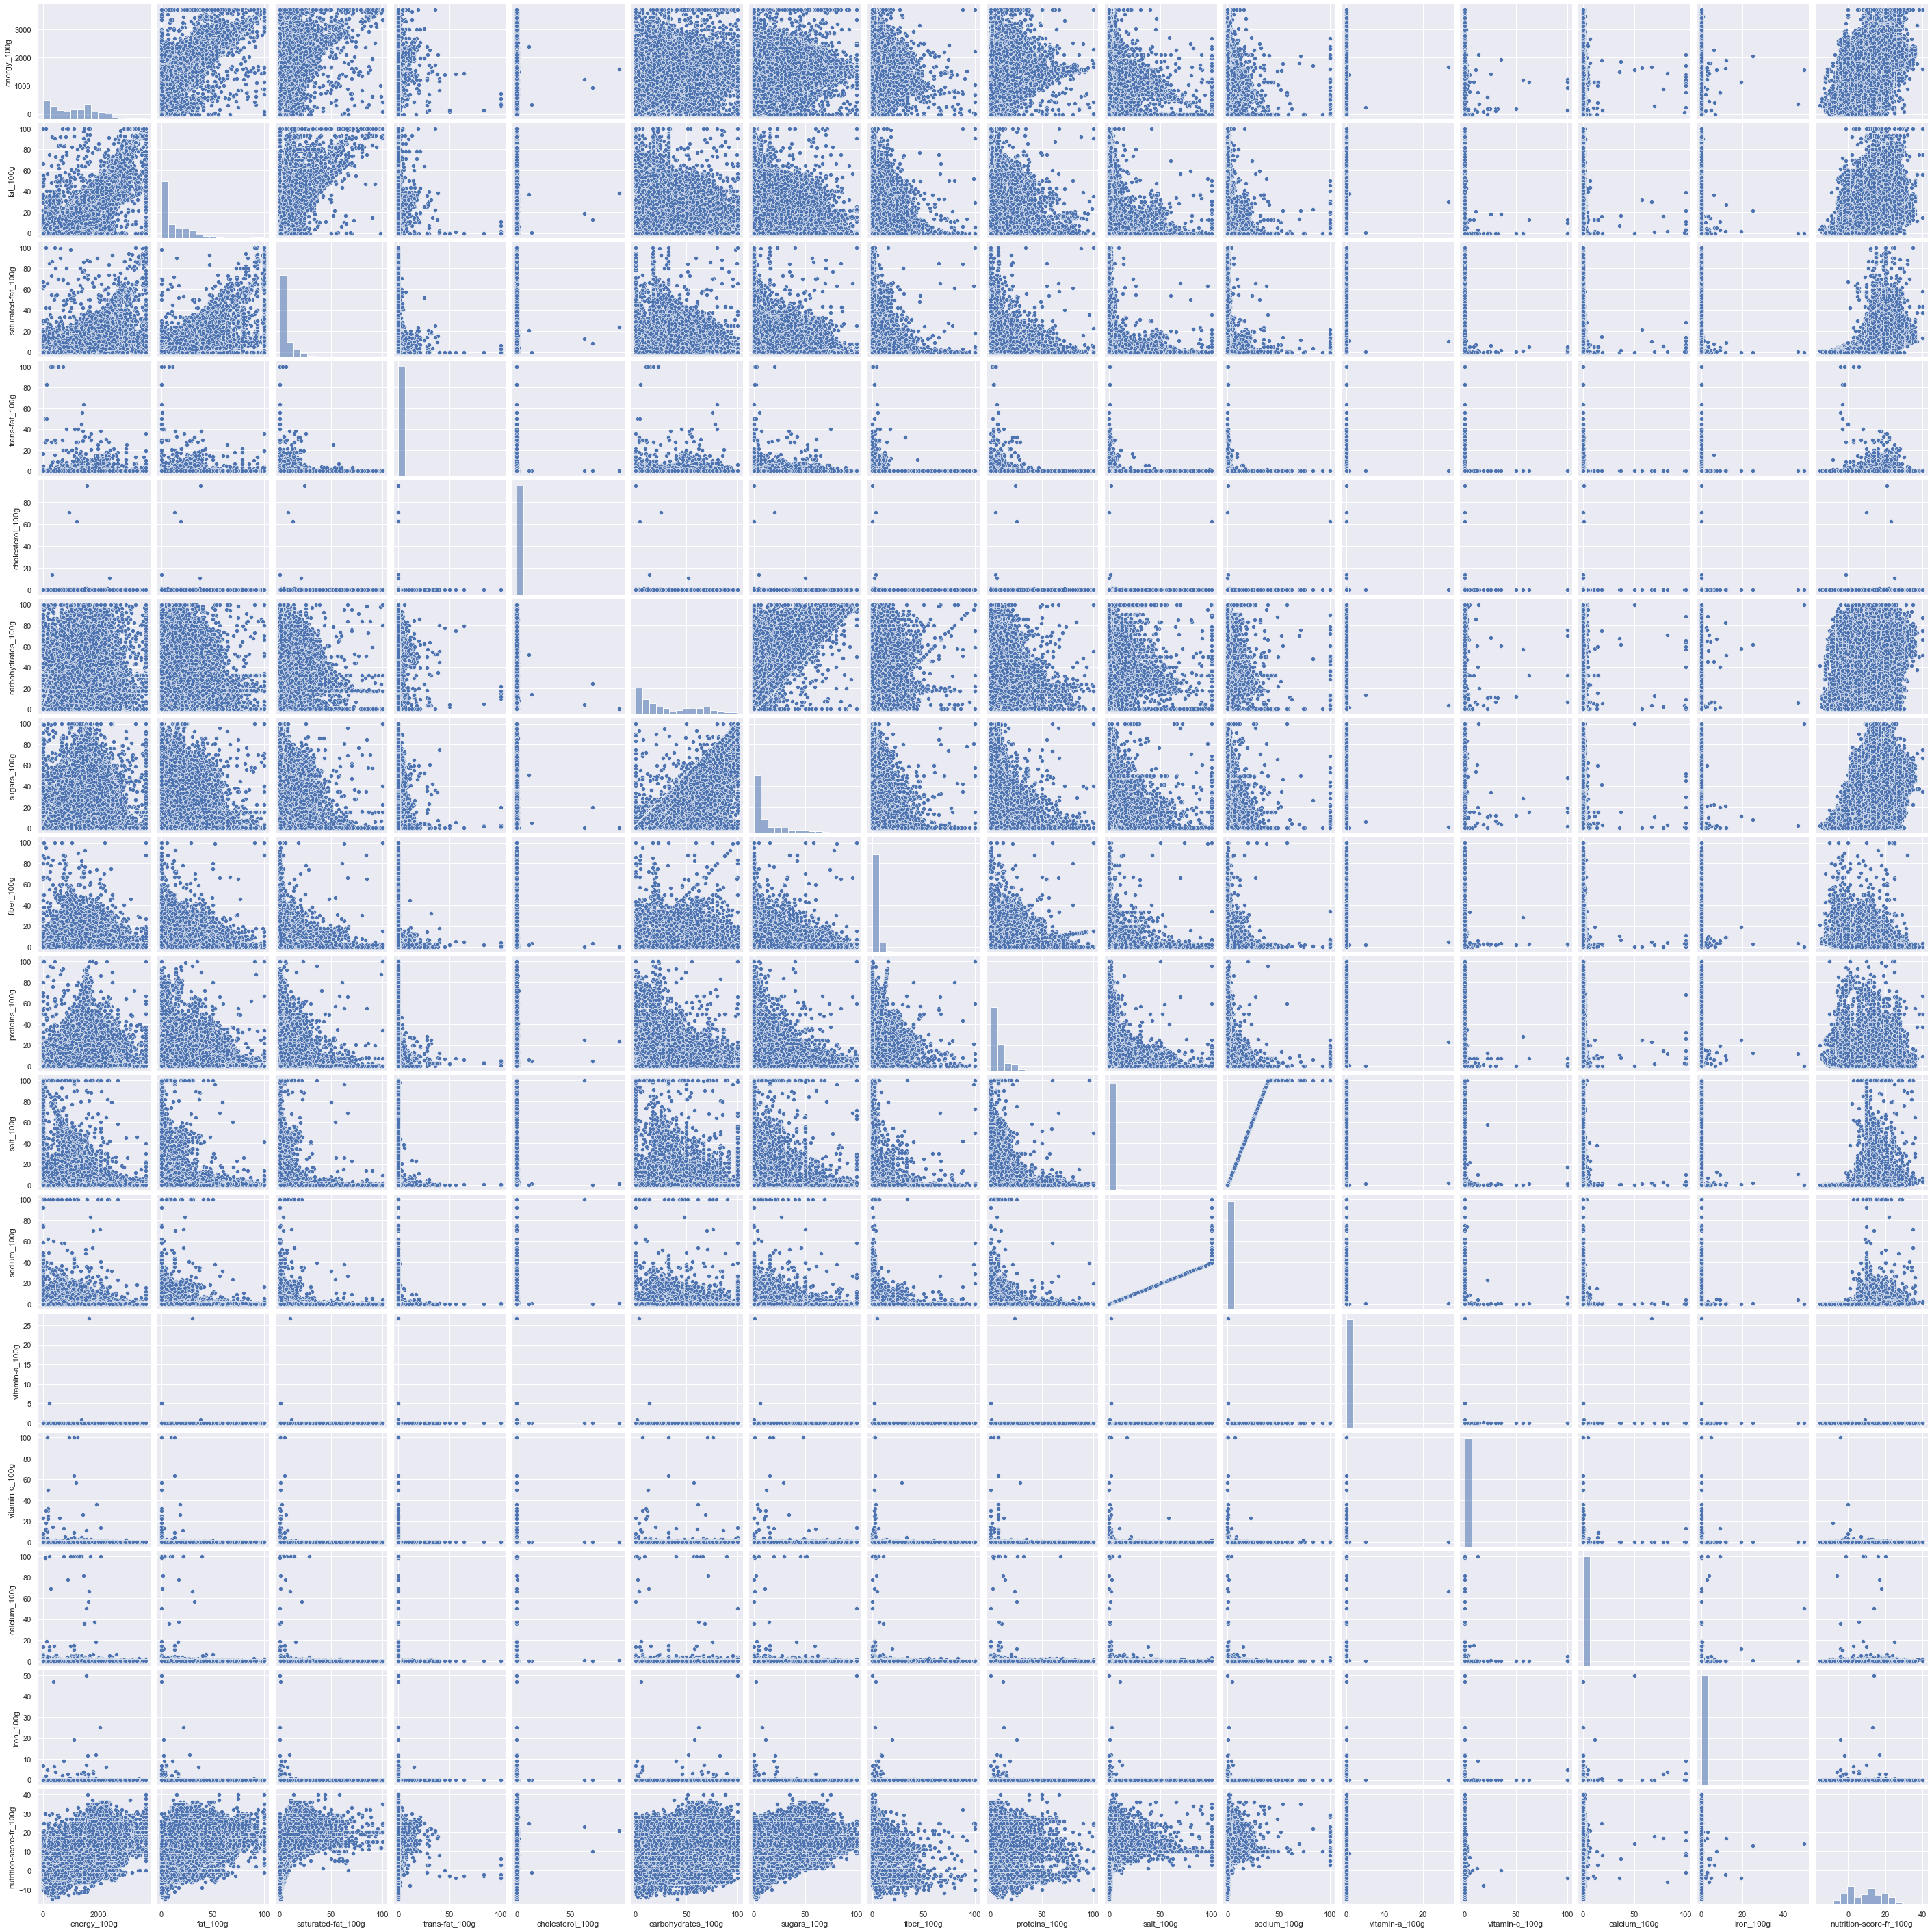

In [15]:
plt.figure(dpi = 120)
sns.pairplot(data_quantit,diag_kind = "hist",diag_kws = {'alpha':0.55, 'bins':15})
plt.show()

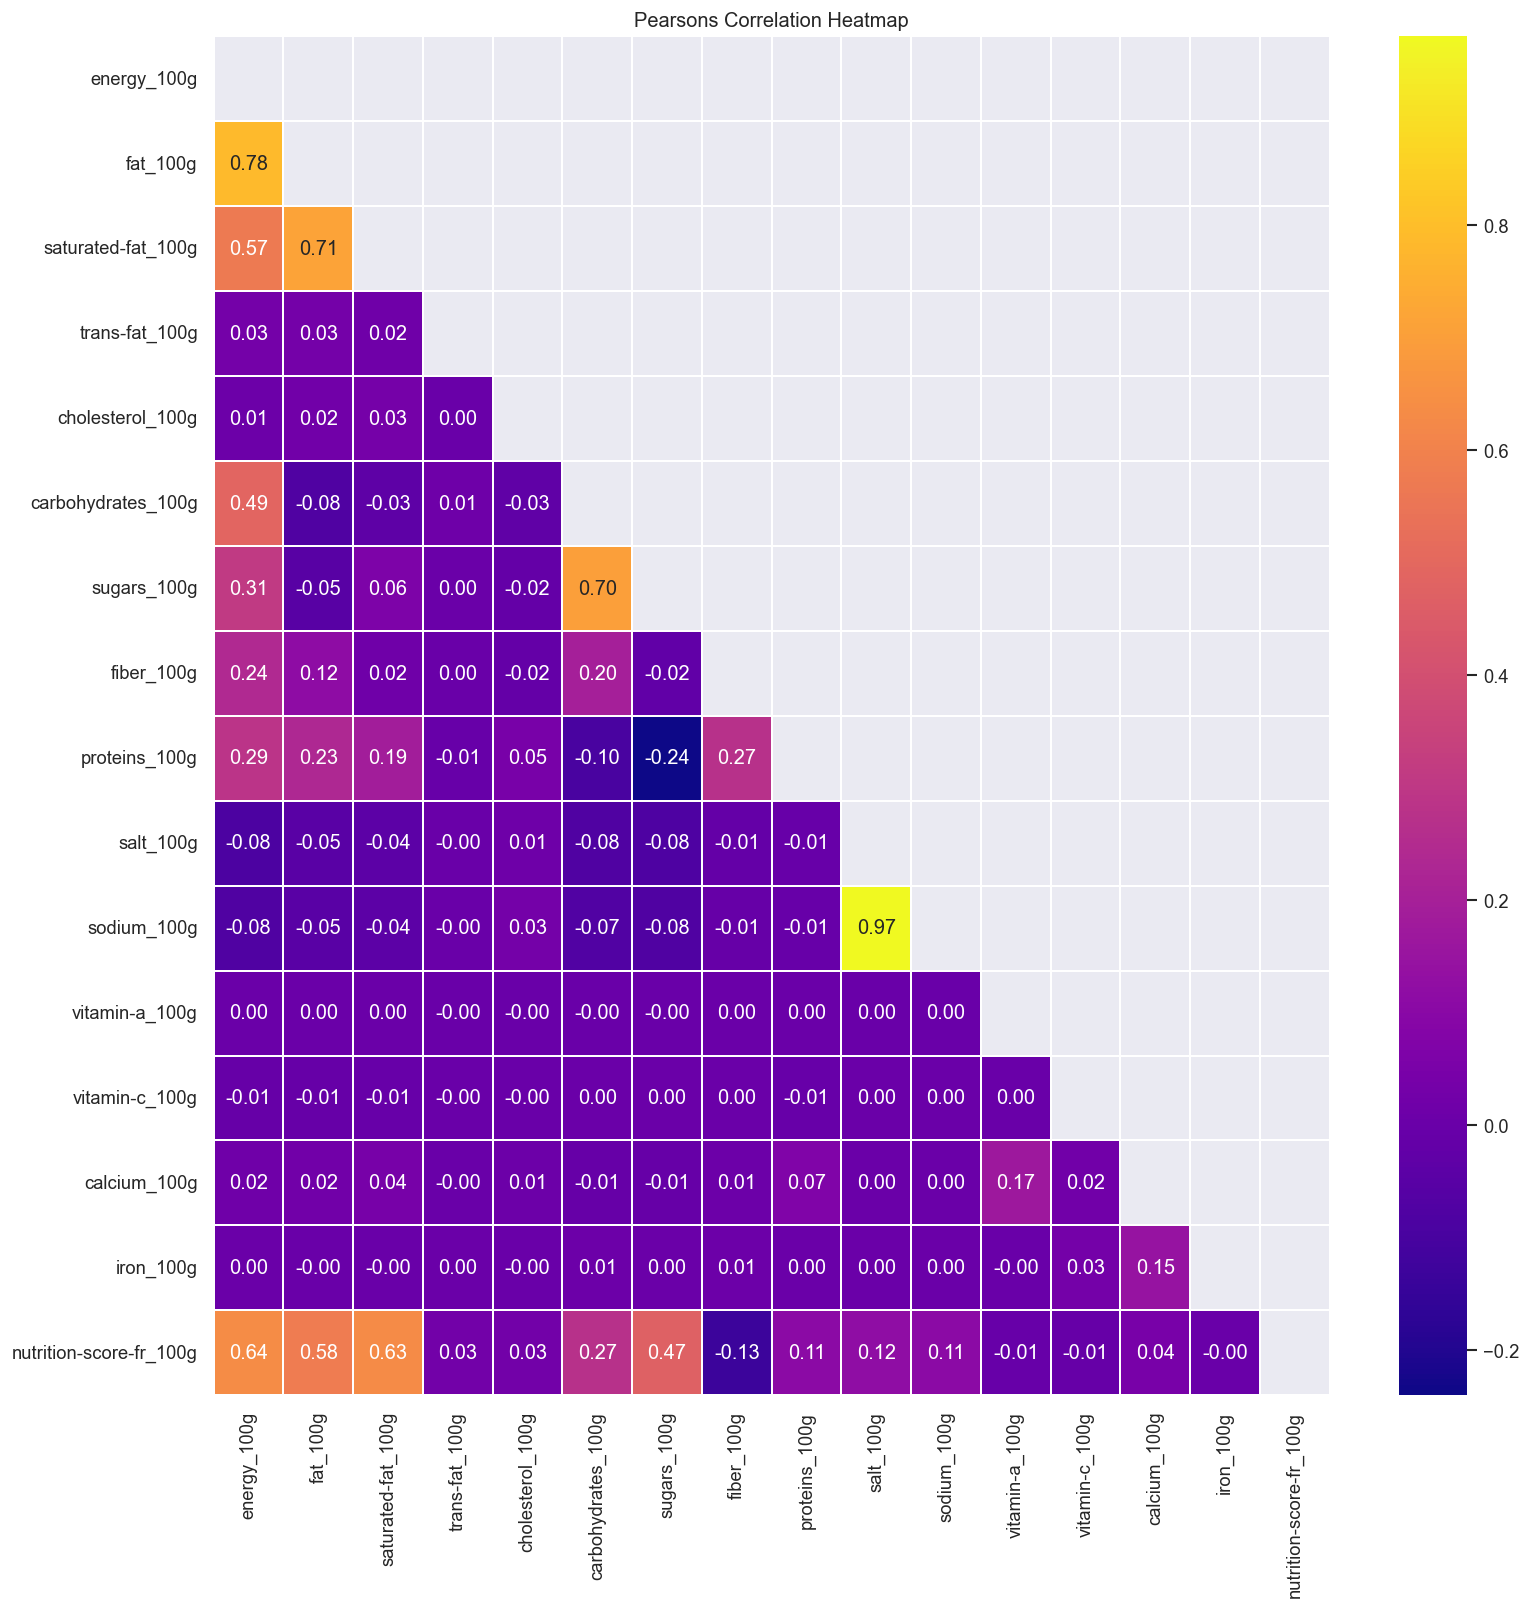

In [16]:
sns.set_style('darkgrid')
plt.figure(dpi = 120,figsize= (15,15))
mask = np.triu(np.ones_like(data_quantit.corr(),dtype = bool))
sns.heatmap(data_quantit.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Pearsons Correlation Heatmap',fontsize= 12)
plt.show()

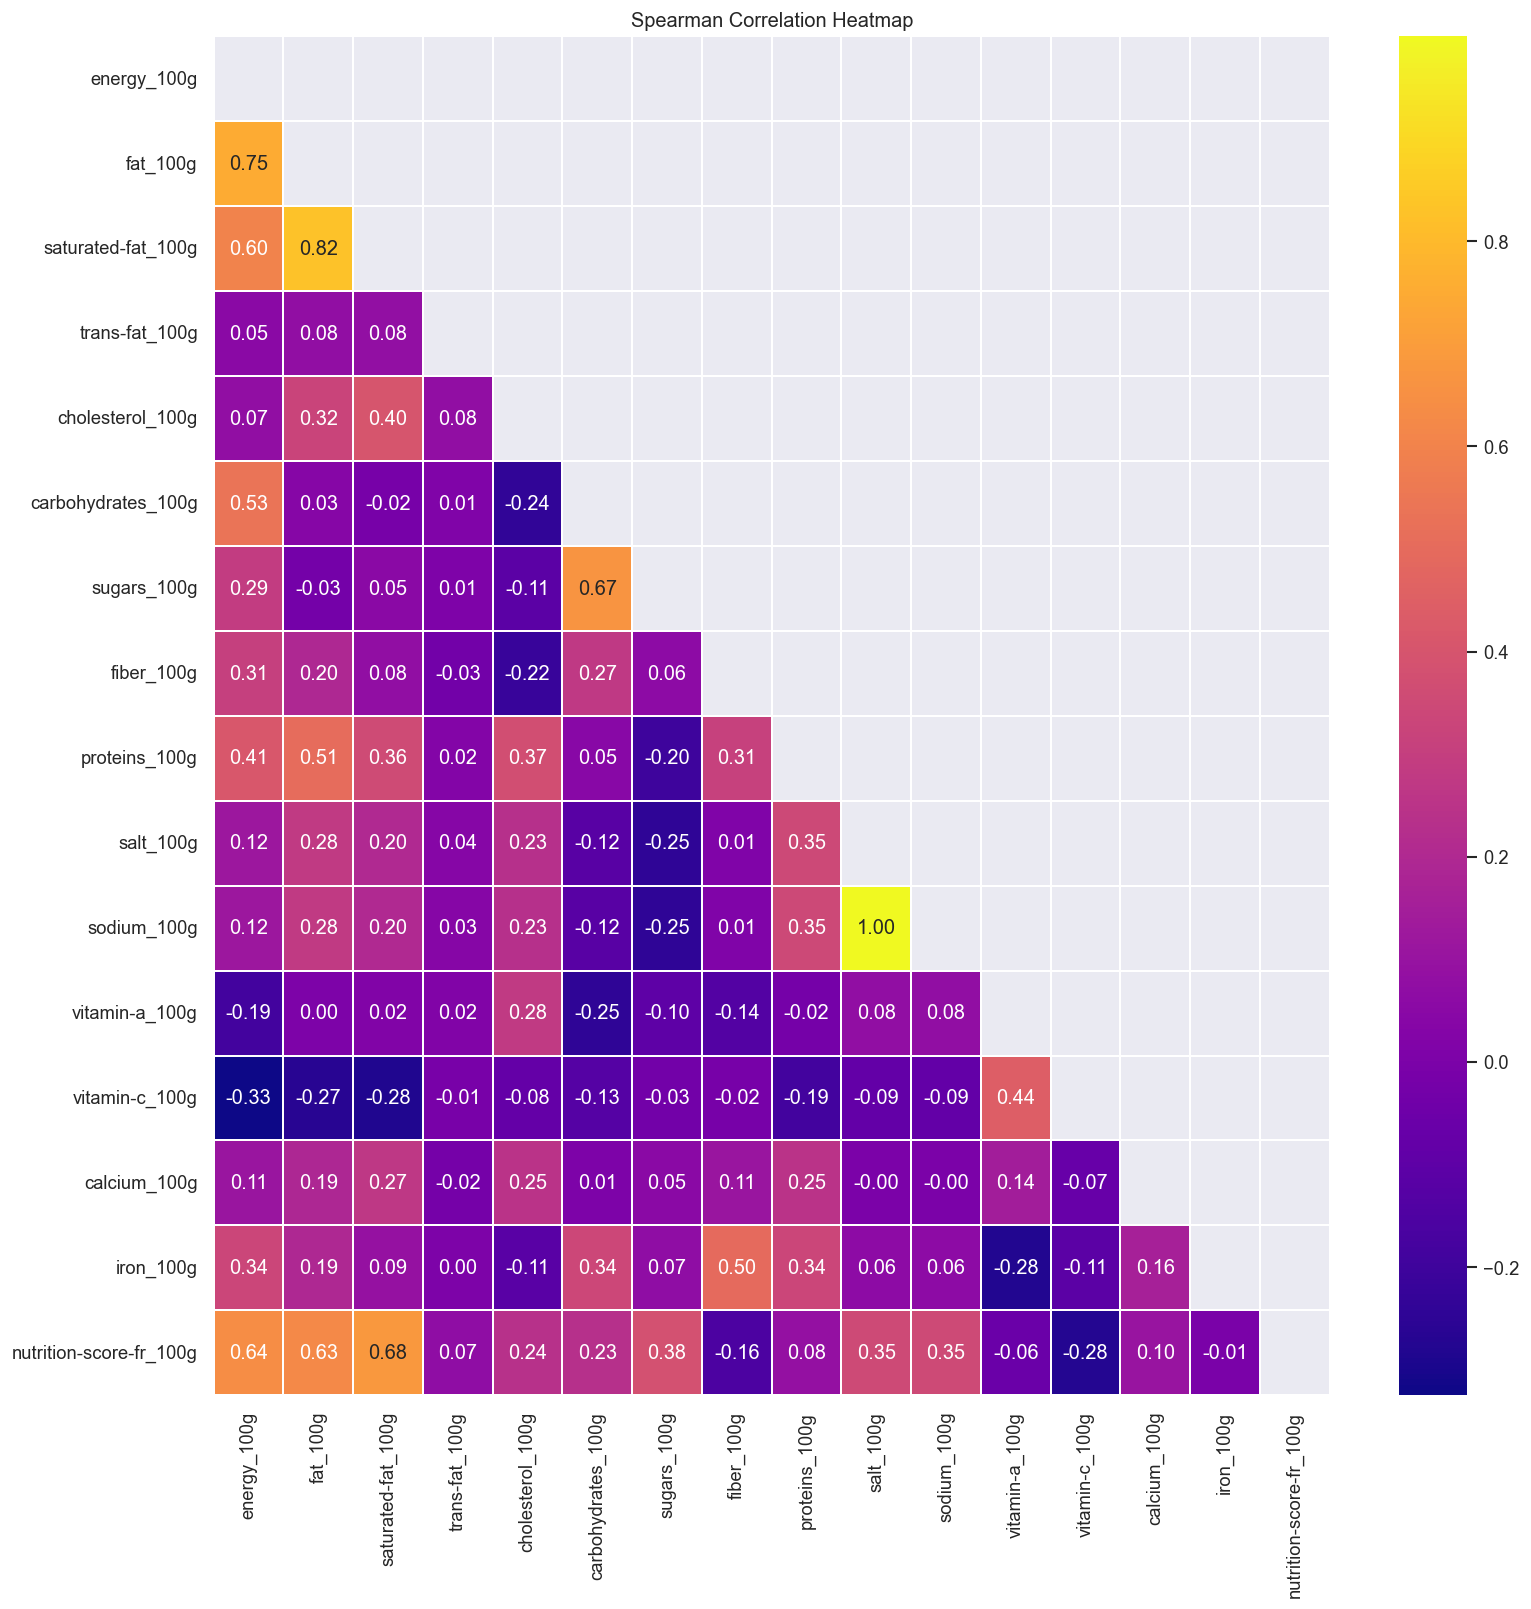

In [17]:
plt.figure(dpi = 120,figsize= (15,15))
mask = np.triu(np.ones_like(data_quantit.corr(),dtype = bool))
sns.heatmap(data_quantit.corr(method = 'spearman'),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Spearman Correlation Heatmap')
plt.show()

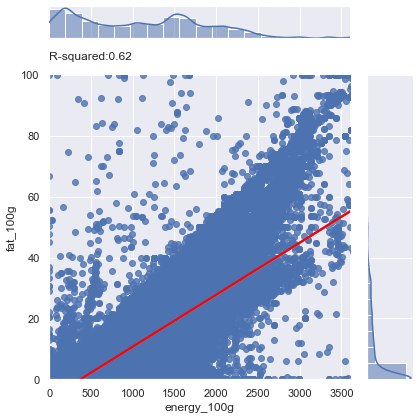

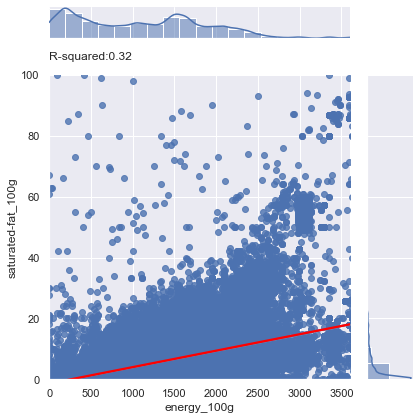

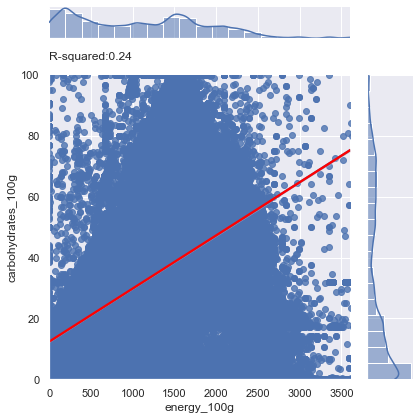

In [18]:
import pingouin as pg
def join_graph(x,y,kind,x_min,x_max,y_min,y_max,):
    R=pg.corr(data_quantit[x].tolist(), data_quantit[y].tolist()).r[0]
    text='R-squared:'+str((R**2).round(2))
    g = sns.jointplot(x = x,
              y = y,
              data = data_quantit, 
              kind = kind,
              marginal_kws=dict(bins=19),
              height=6)
    g1=sns.regplot(x=data_quantit[x], y=data_quantit[y], ax=g.ax_joint, scatter=False, color='red');
    g1.text(0,y_max*1.05,text,fontsize=12)
    g1.set_xlim(x_min,x_max)
    g1.set_ylim(y_min,y_max)
    return

variables_nutritionnelles=['fat_100g','saturated-fat_100g','carbohydrates_100g']
for var in variables_nutritionnelles:
    join_graph('energy_100g',var,'reg',0,3600,0,100)
    plt.tight_layout()

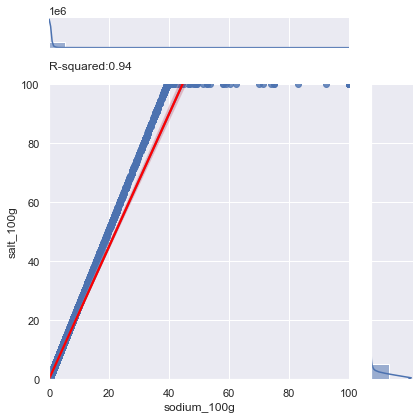

In [19]:
join_graph('sodium_100g','salt_100g','reg',0,100,0,100)
plt.tight_layout()

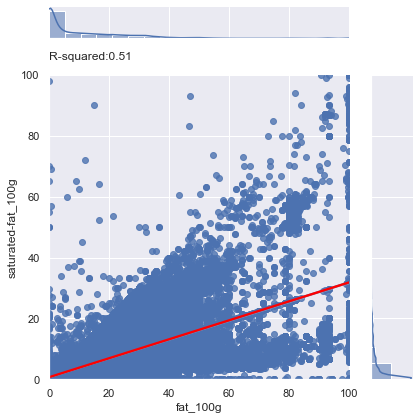

In [20]:
join_graph('fat_100g','saturated-fat_100g','reg',0,100,0,100)
plt.tight_layout()

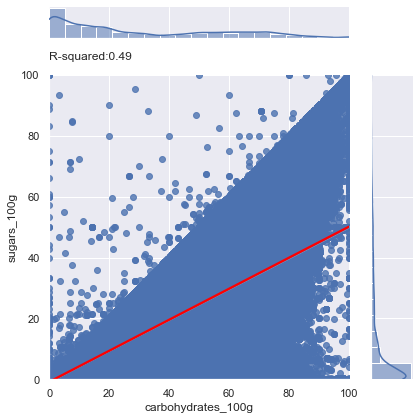

In [21]:
join_graph('carbohydrates_100g','sugars_100g','reg',0,100,0,100)
plt.tight_layout()

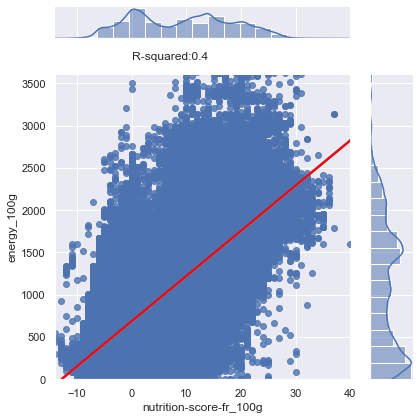

In [22]:
join_graph('nutrition-score-fr_100g','energy_100g','reg',-14,40,0,3600)
plt.tight_layout()

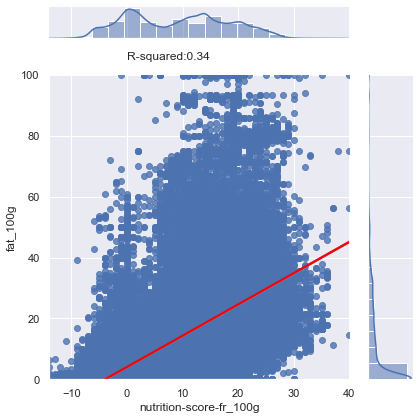

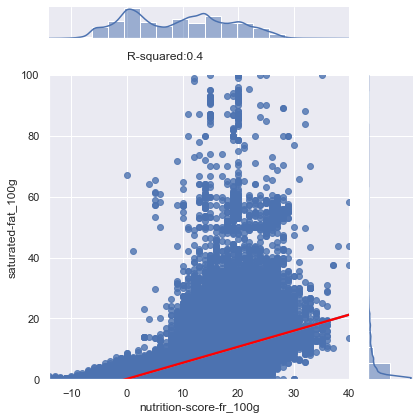

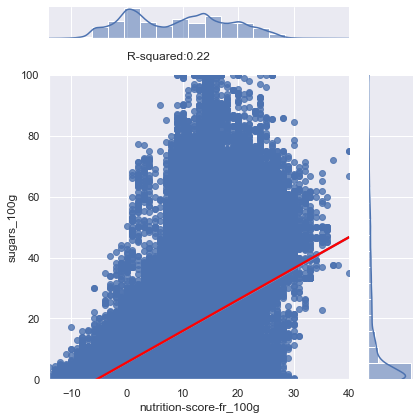

In [23]:
variables_nutritionnelles=['fat_100g','saturated-fat_100g','sugars_100g']
for var in variables_nutritionnelles:
    join_graph('nutrition-score-fr_100g',var,'reg',-14,40,0,100)
    plt.tight_layout()

### Correlation entre nutrition grade et variables nutritionnelles

In [24]:
from pingouin import kruskal

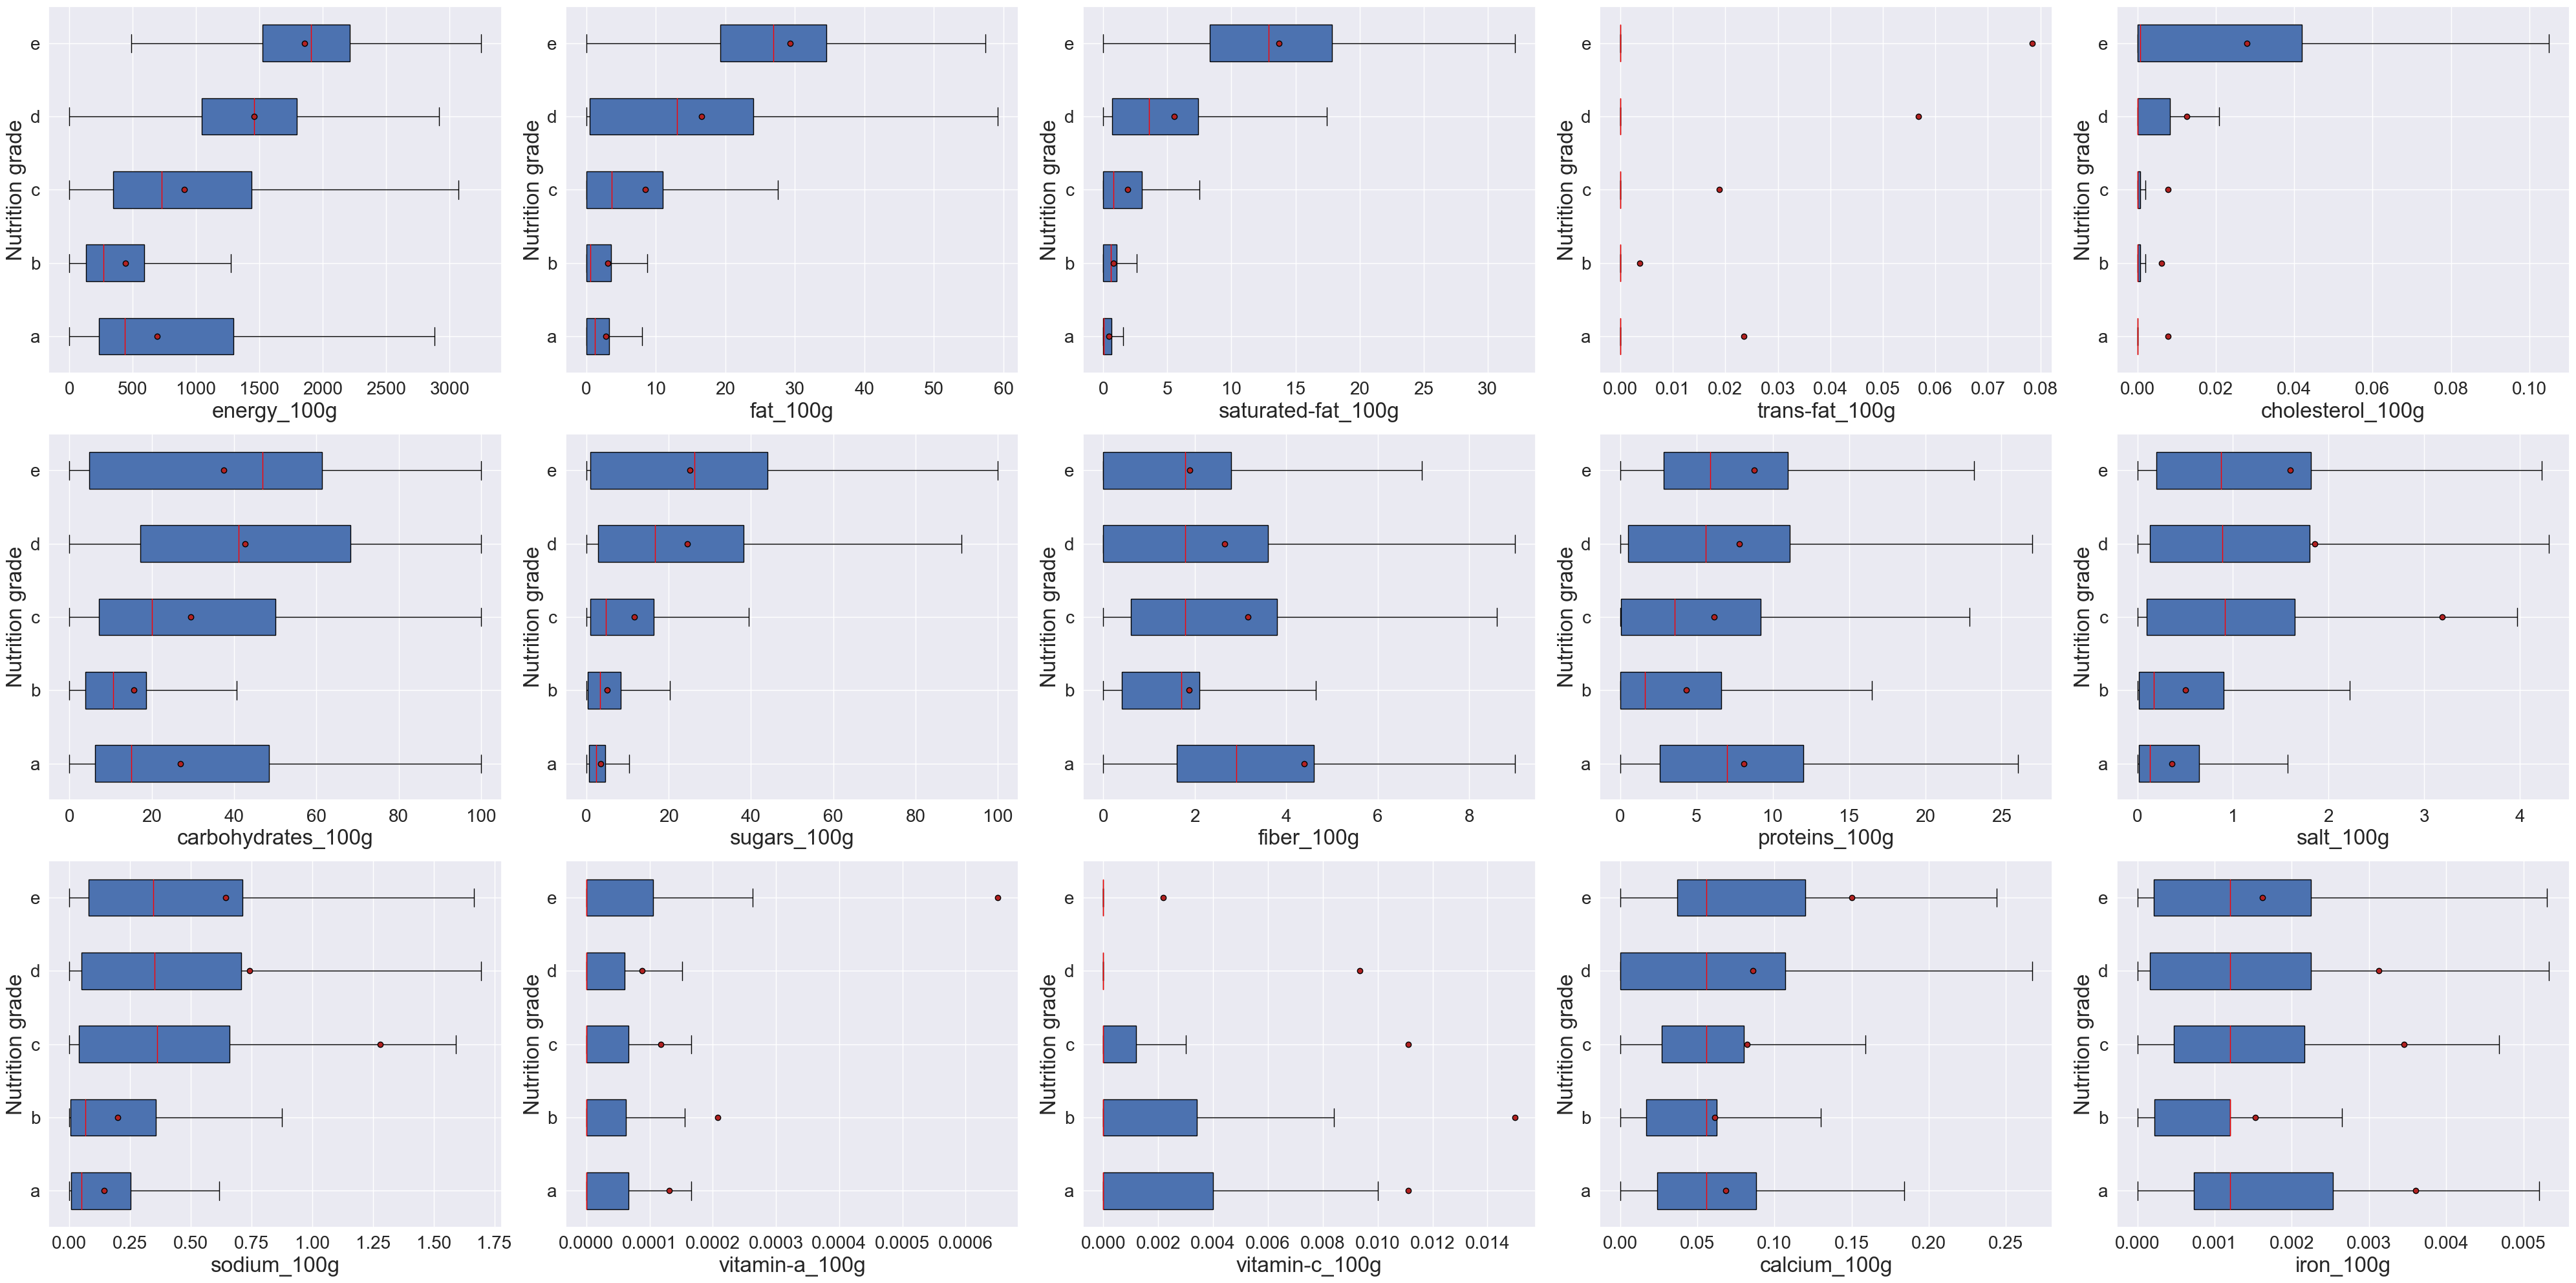

In [25]:
variables_nutritionnelles=['energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g',                
                           'fiber_100g','proteins_100g','salt_100g','sodium_100g','vitamin-a_100g','vitamin-c_100g','calcium_100g',
                          'iron_100g']
i=0
fig=plt.figure(figsize=[40,20],dpi=100)
for var in variables_nutritionnelles:    
    groupes=[]
    categories=['a','b','c','d','e']
    for element in categories:
        groupes.append(data[data['nutrition_grade_fr']==element][var])
    ax=plt.subplot2grid((3,5),(i//5,i%5))
    medianprops = {'color':"red"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
    plt.boxplot(groupes, labels=categories, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_xlabel('{}'.format(var), fontdict=None, loc='center',fontsize=24)
    ax.set_ylabel('Nutrition grade', fontdict=None, loc='center',fontsize=24)
    i+=1
    plt.tight_layout()
plt.show()

In [26]:
for var in variables_nutritionnelles:
    print('-'*30)
    print(var)
    kruskal(data=data,dv=var,between='nutrition_grade_fr'),'\n'
    print(kruskal(data=data,dv=var,between='nutrition_grade_fr'),'\n')

------------------------------
energy_100g
                     Source  ddof1              H  p-unc
Kruskal  nutrition_grade_fr      4  105152.957016    0.0 

------------------------------
fat_100g
                     Source  ddof1             H  p-unc
Kruskal  nutrition_grade_fr      4  82485.660618    0.0 

------------------------------
saturated-fat_100g
                     Source  ddof1              H  p-unc
Kruskal  nutrition_grade_fr      4  107509.914911    0.0 

------------------------------
trans-fat_100g
                     Source  ddof1            H          p-unc
Kruskal  nutrition_grade_fr      4  1208.671441  2.100525e-260 

------------------------------
cholesterol_100g
                     Source  ddof1             H  p-unc
Kruskal  nutrition_grade_fr      4  15192.683124    0.0 

------------------------------
carbohydrates_100g
                     Source  ddof1             H  p-unc
Kruskal  nutrition_grade_fr      4  24810.009237    0.0 

---------------------

## Analyse relations entre variables qualitatives

### pnns_groups_1 vs additives_n

In [27]:
data_qualit=data[~data['additives_n'].isna()]
categories=data_qualit[~data_qualit['pnns_groups_1'].isna()]['additives_n'].unique()
categories=np.sort(categories)
print(categories)
data_subset=data_qualit[~data_qualit['pnns_groups_1'].isna()]
dictionary={}
for element in categories:
    dictionary[element]=data_qualit[data_qualit['additives_n']==element]['pnns_groups_1'].value_counts()
df=pd.DataFrame(dictionary,columns=categories)
df['Total']=df.sum(axis=1)
df=df.sort_values(by=['Total'],ascending=False)
df=df.drop(['Total'],axis=1)
df.head(10)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 31.]


0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
Sugary snacks            1565  2379  1392  1218   856   653   424   282   231   
Milk and dairy products  3767   893   518   512   357   311   226   147    93   
Cereals and potatoes     4234   958   527   322   217   156    76    59    32   
Composite foods          1510   908   741   568   443   346   277   223   147   
Fish Meat Eggs           2036   781  1063   639   413   208   147    95    66   
Beverages                2279   988   638   478   302   287   110    83    62   
Fruits and vegetables    2512  1168   512   118    42    16    17     4     2   
Fat and sauces           1731   542   470   295   218   153   117    58    25   
Salty snacks             1161   306   211   210   148    67    52    34    12   

                          9.0   ...  13.0  14.0  15.0  16.0  17.0  18.0  19.0  \
Sugary snacks            144.0  ...  43.0  45.0  20.0  20.0   9.0   6.0   4.0   
Milk and dairy products   59.0  ...   5.0   8.0   4.0   NaN   2.0   NaN   NaN   
Cereals and potatoes      35.0  ...   4.0   4.0   1.0   NaN   2.0   NaN   NaN   
Composite foods          116.0  ...  34.0  26.0  24.0   8.0   4.0   1.0   1.0   
Fish Meat Eggs            27.0  ...   4.0   NaN   2.0   3.0   NaN   NaN   NaN   
Beverages                 31.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Fruits and vegetables      NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Fat and sauces            14.0  ...   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
Salty snacks              12.0  ...   1.0   1.0   NaN   NaN   NaN   NaN   NaN   

                         20.0  21.0  31.0  
Sugary snacks             5.0   1.0   3.0  
Milk and dairy products   NaN   NaN   NaN  
Cereals and potatoes      NaN   NaN   NaN  
Composite foods           NaN   NaN   NaN  
Fish Meat Eggs            1.0   NaN   NaN  
Beverages                 NaN   NaN   NaN  
Fruits and vegetables     NaN   NaN   NaN  
Fat and sauces            NaN   NaN   NaN  
Salty snacks              NaN   NaN   NaN  

[9 rows x 23 columns]

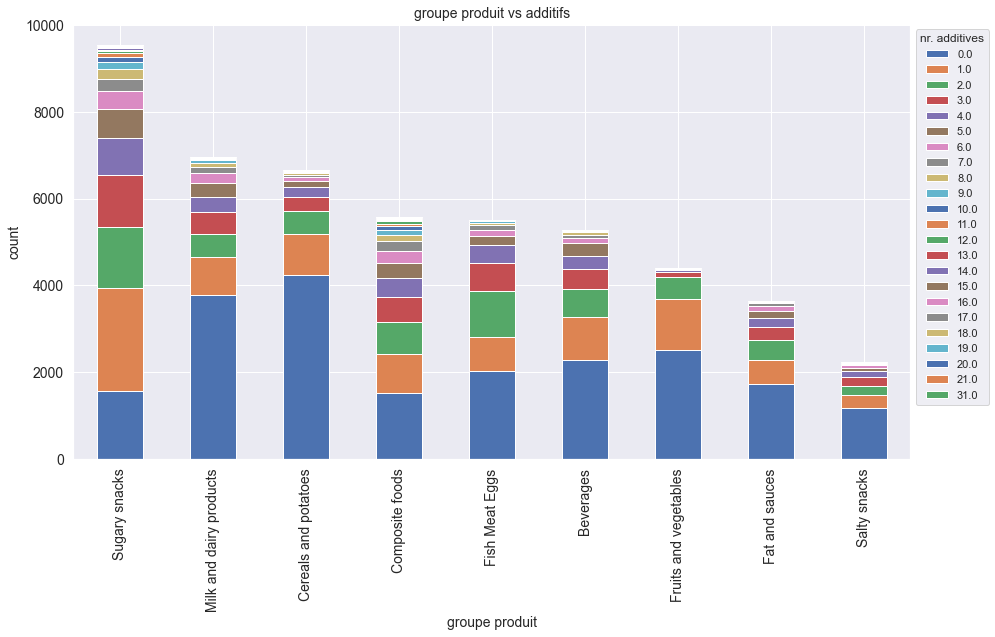

In [28]:
plt.rcParams["figure.figsize"] = (15,8)
fontsize=14
df.plot(kind='bar', stacked=True,fontsize=fontsize);
plt.title('groupe produit vs additifs', fontsize=fontsize)
plt.xlabel('groupe produit', fontsize=fontsize)
plt.ylabel('count', fontsize=fontsize)
plt.legend(bbox_to_anchor =(1, 1),title='nr. additives')

In [29]:
data1=data_qualit[data_qualit['additives_n']<6]

In [30]:
expected, observed, stats = pg.chi2_independence(data1, x='pnns_groups_1',y='additives_n')

In [31]:
(observed-expected).round(2)

additives_n                  0.0     1.0     2.0     3.0     4.0     5.0
pnns_groups_1                                                           
Beverages                  -1.24    9.57  -27.81   -0.09  -26.52   46.09
Cereals and potatoes     1292.44 -304.20 -331.92 -294.74 -206.80 -154.78
Composite foods          -561.11   19.30  136.25  133.76  144.61  127.19
Fat and sauces            167.58 -128.85   13.49  -32.80   -7.25  -12.18
Fish Meat Eggs           -321.28 -230.50  374.69  144.76   73.38  -41.05
Fruits and vegetables     508.77  308.43  -72.93 -302.01 -246.61 -195.64
Milk and dairy products   851.12 -358.18 -333.42  -99.36  -63.10    2.94
Salty snacks              196.53 -107.85  -70.62    7.78    9.05  -34.90
Sugary snacks           -2132.82  792.29  312.26  442.69  323.24  262.32

In [32]:
stats[stats['test']=='pearson'].round(2)

test  lambda     chi2   dof  pval  cramer  power
0  pearson     1.0  5686.41  40.0   0.0    0.07    1.0

### pnns_groups_1 vs nutrition_grade_fr

In [33]:
categories=data[~data['pnns_groups_1'].isna()]['nutrition_grade_fr'].unique()
print(categories)
dictionary={}
for element in categories:
    dictionary[element]=data[data['nutrition_grade_fr']==element]['pnns_groups_1'].value_counts()
df=pd.DataFrame(dictionary,columns=['a','b','c','d','e'])
df['Total']=df.sum(axis=1)
df=df.sort_values(by=['Total'],ascending=False)
df=df.drop(['Total'],axis=1)
df.head()

['c' 'd' 'b' 'e' 'a']


a     b     c     d     e
Sugary snacks              76   350   972  4102  5136
Milk and dairy products   754  1537  1828  3275   377
Cereals and potatoes     3547  1136  1617  1029   120
Beverages                 402  1038  1866  1001  2186
Composite foods          1392  1911  1702   925    83

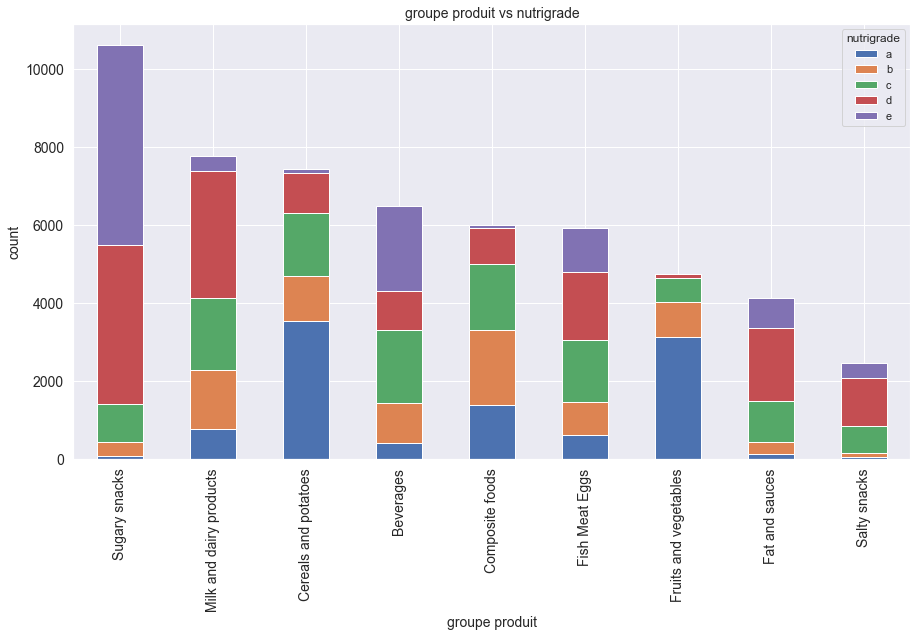

In [34]:
plt.rcParams["figure.figsize"] = (15,8)
df.plot(kind='bar', stacked=True, fontsize=fontsize);
fontsize=14
plt.title('groupe produit vs nutrigrade', fontsize=fontsize)
plt.xlabel('groupe produit', fontsize=fontsize)
plt.ylabel('count', fontsize=fontsize)
plt.legend(bbox_to_anchor =(1, 1), title='nutrigrade')

In [35]:
expected, observed, stats = pg.chi2_independence(data, x='pnns_groups_1',y='nutrition_grade_fr')

In [36]:
(observed-expected).round(2)

nutrition_grade_fr             a        b        c        d        e
pnns_groups_1                                                       
Beverages                -775.35    92.69   472.83  -784.58   994.41
Cereals and potatoes     2196.30    51.50    18.71 -1019.48 -1247.04
Composite foods           301.69  1035.57   411.82  -728.58 -1020.50
Fat and sauces           -624.70  -306.14   171.06   738.52    21.25
Fish Meat Eggs           -467.18   -12.47   312.92   121.90    44.83
Fruits and vegetables    2266.61   207.18  -404.11 -1206.88  -862.80
Milk and dairy products  -655.09   405.62   160.62  1137.97 -1049.13
Salty snacks             -389.69  -275.46   166.24   564.02   -65.11
Sugary snacks           -1852.59 -1198.49 -1310.11  1177.10  3184.09

In [37]:
stats[stats['test']=='pearson'].round(2)

test  lambda      chi2   dof  pval  cramer  power
0  pearson     1.0  31476.24  32.0   0.0    0.17    1.0

### nutrition_grade_fr vs additives_n

In [38]:
categories=data_qualit['additives_n'].unique()
categories=np.sort(categories)
print(categories)
dictionary={}
for element in categories:
    dictionary[element]=data_qualit[data_qualit['additives_n']==element]['nutrition_grade_fr'].value_counts()
df=pd.DataFrame(dictionary,columns=categories)
df['Total']=df.sum(axis=1)
df=df.sort_values(by=['Total'],ascending=True)
df=df.drop(['Total'],axis=1)
df.head()

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 31.]


0.0    1.0    2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  21.0  \
a  20563   5573   4400  1635   944   709   414   248   175   107  ...   NaN   
b  16466   7598   5568  2995  2071  1759  1171   764   516   311  ...   NaN   
e  10173  10724   7433  5837  3201  1864  1061   622   388   234  ...  10.0   
c  17832   9876   7776  5110  3375  2412  1490   888   665   474  ...   1.0   
d  19833  11181  10404  7531  5297  3919  2944  2034  1508   999  ...   9.0   

   22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0  31.0  
a   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
b   2.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
e  10.0  10.0   4.0   3.0   NaN   1.0   2.0   NaN   NaN  
c   4.0   1.0   3.0   2.0   NaN   NaN   NaN   NaN   1.0  
d  10.0   2.0   3.0   6.0   2.0   1.0   NaN   2.0   3.0  

[5 rows x 31 columns]

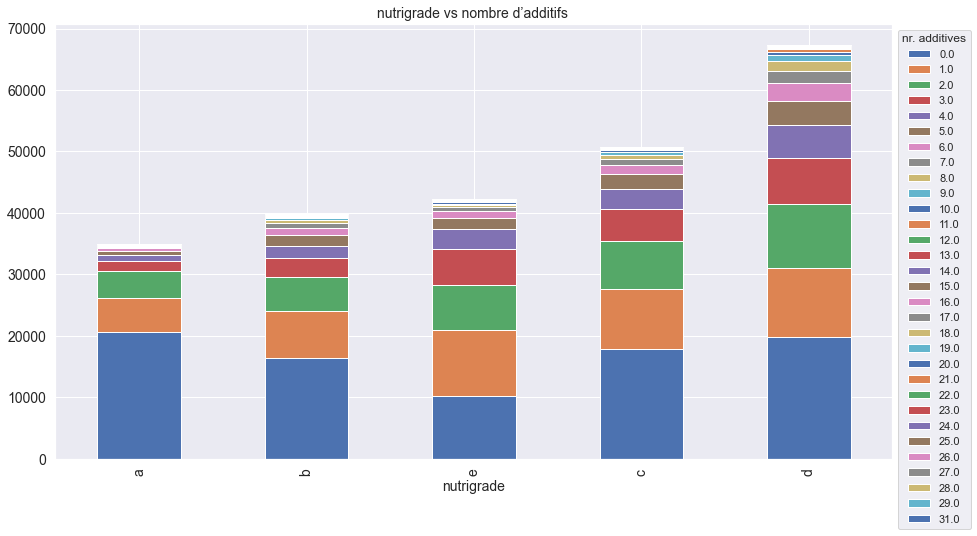

In [39]:
plt.rcParams["figure.figsize"] = (15,8)
df.plot(kind='bar', stacked=True, fontsize=fontsize);
plt.title('nutrigrade vs nombre d’additifs ', fontsize=fontsize)
plt.xlabel('nutrigrade', fontsize=fontsize)
plt.legend(bbox_to_anchor =(1, 1),title='nr. additives')

In [40]:
data1=data[data['additives_n']<7]

In [41]:
expected, observed, stats = pg.chi2_independence(data1, x='nutrition_grade_fr',y='additives_n')

In [42]:
(observed-expected).round(2)

additives_n             0.0      1.0      2.0      3.0      4.0     5.0  \
nutrition_grade_fr                                                        
a                   7423.41 -1386.72 -1108.85 -1942.71 -1361.04 -941.91   
b                   2025.42   -50.83  -486.30  -936.95  -462.27  -55.37   
c                   -539.56   145.03    73.61   107.70   152.12  103.73   
d                  -3618.94 -1240.92   571.64  1145.39  1182.89  972.41   
e                  -5290.33  2533.45   949.90  1626.57   488.31  -78.87   

additives_n            6.0  
nutrition_grade_fr          
a                  -682.17  
b                   -33.70  
c                   -42.64  
d                   987.53  
e                  -229.02

In [43]:
stats[stats['test']=='pearson'].round(2)

test  lambda      chi2   dof  pval  cramer  power
0  pearson     1.0  13755.17  24.0   0.0    0.12    1.0

# REDUCTION DIMENSIONNELLE

## ACP et éboulis des valeurs propres

In [44]:
n_components=16

In [45]:
from sklearn import decomposition, preprocessing
data_quantit=data_quantit[data['nutrition-score-fr_100g'].isnull()==False].reset_index()
data_quantit=data_quantit.drop(['index'],axis=1)

In [46]:
#centrage et réduction des données pour les variables quantitatives
X=data_quantit.values
print(len(X))
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

221019


In [47]:
#calcul composantes principales
pca=decomposition.PCA(n_components)
pca.fit(X_scaled)

PCA(n_components=16)

[20.26996808 12.7813834  11.17288476  8.24367369  7.59642417  6.34865831
  6.24668635  6.21491953  6.09137513  4.96549271  4.07088833  2.62253096
  1.6843063   1.21789786  0.31458557  0.15832485]
[ 20.26996808  33.05135148  44.22423624  52.46790993  60.0643341
  66.41299241  72.65967876  78.87459828  84.96597341  89.93146612
  94.00235446  96.62488542  98.30919172  99.52708958  99.84167515
 100.        ]


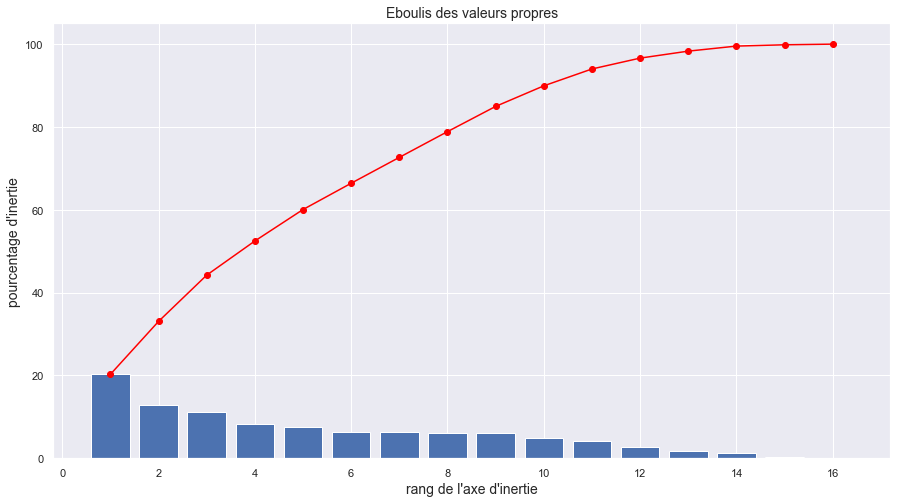

In [48]:
# Eboulis des valeurs propres
scree = pca.explained_variance_ratio_*100
print(scree)
plt.bar(np.arange(len(scree))+1, scree)
print(np.cumsum(scree))
plt.plot(np.arange(len(scree))+1,np.cumsum(scree),c="red",marker='o')
plt.rcParams.update({'font.size': 14})
plt.xlabel("rang de l'axe d'inertie", fontsize=fontsize)
plt.ylabel("pourcentage d'inertie", fontsize=fontsize)
plt.title("Eboulis des valeurs propres", fontsize=fontsize)
plt.show(block=False)

## Cercle des corrélations 

In [49]:
n = data_quantit.shape[0] # nb individus
p = data_quantit.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres (valeur propre = inertie de l'axe correspondante = inertie de la projection du nuage de points sur l'axe)  )
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]  #Corrélations variables x facteurs=sqrt(valeur propre)*vecteur propre
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id':data_quantit.columns, 
                         'COR_1': corvar[:,0],'COEFF_F1':pca.components_[0],
                         'COR_2': corvar[:,1],'COEFF_F2':pca.components_[1],
                         'COR_3': corvar[:,2],'COEFF_F3':pca.components_[2],
                         'COR_4': corvar[:,3],'COEFF_F4':pca.components_[3],
                         'COR_5': corvar[:,4],'COEFF_F5':pca.components_[4],
                         'COR_6': corvar[:,5],'COEFF_F6':pca.components_[5]})

cm = sns.color_palette("Blues_d", as_cmap=True)
pd.set_option("display.precision", 2)
coordvar.style.background_gradient(cmap=cm)

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')


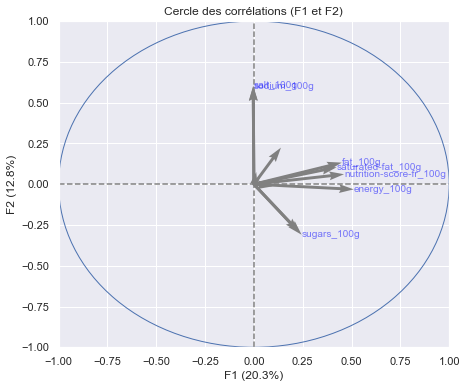

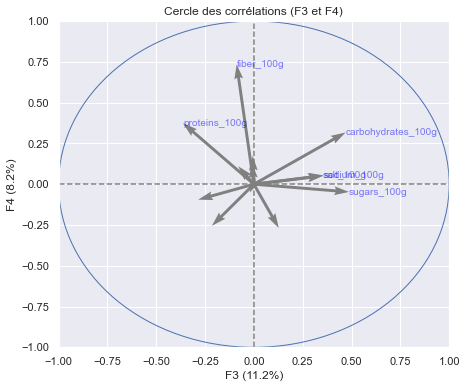

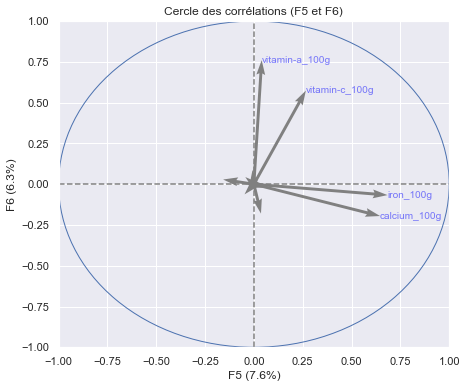

In [50]:
# Cercle des corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 2 premiers plans factoriels, donc les 4 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                    pcs[d1,:], pcs[d2,:], 
                    angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None: 
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if abs(x) >= 0.3 and x <= xmax or abs(y) >= 0.3 and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='left', va='center', rotation=label_rotation, c="blue", alpha=0.5)
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            
pcs = pca.components_
sqrt_valprop = np.sqrt(pca.explained_variance_)

#print(sqrt_valprop)
QLT=np.sqrt(pcs[0,0])

#print(pcs)
names=data_quantit.columns
print(names)
display_circles(pcs, n_components, pca, [(0,1),(2,3),(4,5)],labels = np.array(names))

## Projection des produits sur les plans factoriels

In [51]:
nutrigrade = data[data['nutrition-score-fr_100g'].isnull()==False]['nutrition_grade_fr'].reset_index()
#nutrigrade = data['nutrition_grade_fr'].values
nutrigrade=nutrigrade.drop(['index'],axis=1)
nutrigrade=nutrigrade['nutrition_grade_fr'].values

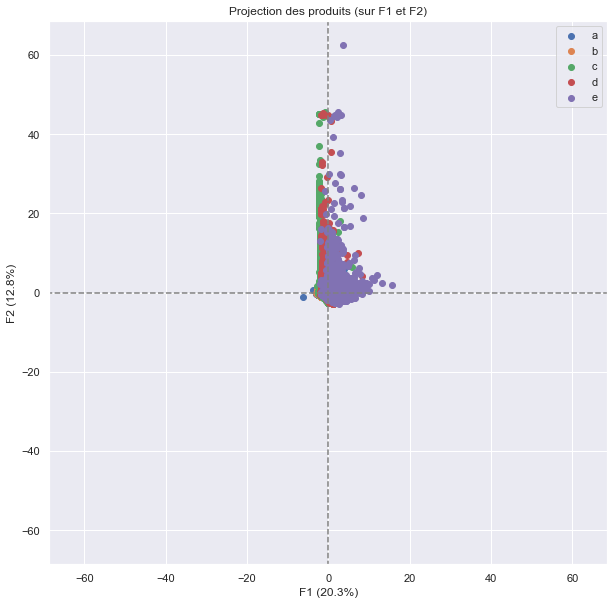

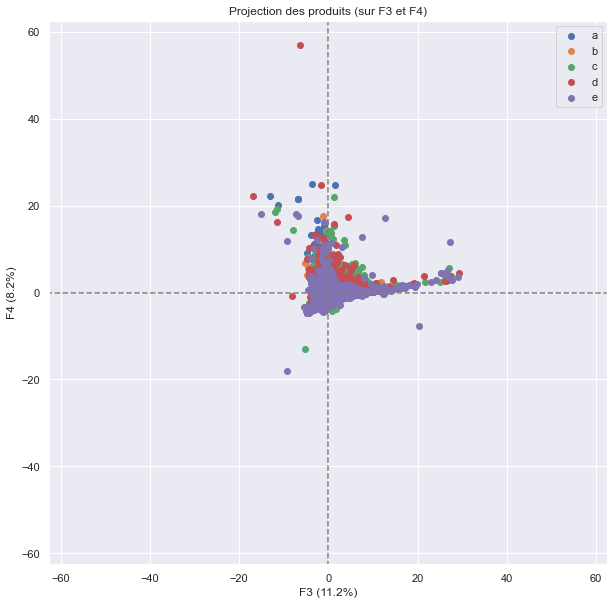

In [52]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[0:3, d1], X_projected[0:3, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)

                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:

                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    if x>200 or y>200:
                        print(i)
                        plt.text(x, y, labels[i],
                              fontsize='10', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des produits (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, 6, pca, [(0,1),(2,3)],illustrative_var=nutrigrade)


plt.show()


In [53]:
Var_synth_df = pd.DataFrame(X_projected[:,:4], index=data_quantit.index, 
                          columns=["F"+str(i+1) for i in range(4)])
Var_synth_df.head()

F1    F2    F3    F4
0  2.90 -0.35 -0.38 -0.53
1  0.42 -0.37 -0.17  2.09
2  2.31  0.92 -1.85  1.04
3  0.93 -0.43 -0.28  1.88
4  1.63  0.64 -1.04  1.20